In [1]:
import os
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import jieba

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
from wordcloud import WordCloud,ImageColorGenerator
import imageio
import snownlp
from snownlp import SnowNLP

In [2]:
os.getcwd()

'C:\\Users\\zhhu\\Documents\\_Materials\\CDA\\Dog Food Comparative Analysis\\final version'

##### 版本问题

 wheel安装步骤 
    - 下载适合自己python版本的包：https://www.lfd.uci.edu/~gohlke/pythonlibs/  
    - pip install wheel
    - 目标文件夹的cd,pip install somewhat.whl

In [3]:
print("pandas 版本：",pd.__version__)
print("numpy 版本：",np.__version__)

pandas 版本： 0.23.4
numpy 版本： 1.15.1


- 检查更新：pip list --outdated
- 更新： pip install --upgrade xxxx

pandas 0.23.4 documentation  http://pandas.pydata.org/pandas-docs/stable/index.html

# 数据处理（一）

#### 销售数据概况

In [4]:
df_raw_1 = pd.read_excel('Product_details_rawdata.xlsx')  # 183 rows x 25 columns
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription'],
      dtype='object')

In [5]:
df_raw_1.head()

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,BodyType,ApplicablePhase,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,通用型,幼犬,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,NaN
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,NaN,幼犬,ROYAL CANIN/皇家,NaN,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,大型犬,离乳期,ROYAL CANIN/皇家,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,NaN
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,NaN,成犬,ROYAL CANIN/皇家,NaN,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,NaN
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,NaN,幼犬,ROYAL CANIN/皇家,NaN,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN


In [12]:
len(df_raw_1)

183

In [13]:
df_raw_1.describe()

,item_id,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Weight
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2.669680e+11,307.403279,11136.404372,407.229508,2648.890710,153.508197,1879.065574,5344.699454
std,2.556689e+11,257.744147,31369.026185,1068.822091,6659.411861,128.909154,4007.666013,4927.903706
min,1.562877e+10,9.900000,15.000000,1.000000,2.000000,4.000000,13.000000,100.000000
25%,2.669303e+10,135.500000,1064.500000,39.000000,267.500000,67.500000,248.500000,2000.000000
50%,4.388117e+10,225.000000,2883.000000,149.000000,736.000000,112.000000,584.000000,3000.000000
75%,5.364667e+11,460.000000,7704.500000,322.500000,2090.000000,230.000000,1458.500000,7500.000000
max,5.649716e+11,1300.000000,337524.000000,9931.000000,56434.000000,650.000000,34370.000000,30000.000000


describe方法用于一次性产生多个汇总统计,默认对数值型数据.对于非数值型数据,describe会产生出另外一种汇总统计.

In [14]:
df_raw_1.item_name.describe()

count                                         183
unique                                        183
top       Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮
freq                                            1
Name: item_name, dtype: object

共有183种不同的产品

##### 品牌

In [15]:
df_raw_1.Brand.describe()

count                183
unique                 5
top       ROYAL CANIN/皇家
freq                  91
Name: Brand, dtype: object

In [16]:
df_raw_1.Brand.value_counts(dropna=False)

ROYAL CANIN/皇家       91
Pedigree/宝路          38
Nature Bridge/比瑞吉    28
Fish4Dogs/海洋之星       24
Chappi/佳贝             2
Name: Brand, dtype: int64

##### 口味

In [17]:
df_raw_1.Tastes.describe()

count     183
unique      5
top        其他
freq      130
Name: Tastes, dtype: object

In [18]:
df_raw_1.Tastes.unique()

array(['其他', '牛肉味', '鸡肉味', '鱼肉味', '深海鱼味'], dtype=object)

In [19]:
df_raw_1.Tastes.value_counts(dropna=False)

其他      130
鱼肉味      25
牛肉味      17
鸡肉味       9
深海鱼味      2
Name: Tastes, dtype: int64

##### 适用体型

In [20]:
df_raw_1.BodyType.describe()

count     137
unique      6
top       通用型
freq       47
Name: BodyType, dtype: object

In [21]:
df_raw_1.BodyType.unique()

array(['通用型', nan, '大型犬', '小型犬', '中型犬', '中小型犬', '中大型犬'], dtype=object)

In [22]:
df_raw_1.BodyType.value_counts(dropna=False)

通用型     47
小型犬     46
NaN     46
大型犬     20
中小型犬    16
中型犬      6
中大型犬     2
Name: BodyType, dtype: int64

##### 适用年龄

In [23]:
df_raw_1.ApplicablePhase.describe()

count     183
unique      6
top        成犬
freq       92
Name: ApplicablePhase, dtype: object

In [24]:
df_raw_1.ApplicablePhase.value_counts(dropna=False)

成犬                               92
幼犬                               55
老年犬                              13
全犬期                              12
离乳期                               7
使用于怀孕42天起的母犬、哺乳期母犬及2月龄以下离乳期幼犬     4
Name: ApplicablePhase, dtype: int64

##### 狗粮种类

In [25]:
df_raw_1.Classification.describe()

count     148
unique      3
top        犬粮
freq      104
Name: Classification, dtype: object

In [26]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     104
专用粮     36
NaN     35
奶糕       8
Name: Classification, dtype: int64

##### 适用品种

In [27]:
df_raw_1.Breed.describe()

count     156
unique     14
top       通用型
freq      106
Name: Breed, dtype: object

In [28]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       106
NaN        27
贵宾/泰迪      15
约克夏梗        4
拉布拉多        4
日本柴犬        4
斗牛犬         4
金毛          4
比熊          3
雪纳瑞         3
德国牧羊犬       3
吉娃娃         2
可卡          2
博美          1
西部高地白梗      1
Name: Breed, dtype: int64

##### 功能性配方

In [29]:
df_raw_1.RecipeTastePrescription.describe()

count     79
unique    48
top        无
freq       6
Name: RecipeTastePrescription, dtype: object

##### 原产国

In [30]:
df_raw_1.Origin.describe()

count     183
unique      3
top        中国
freq      169
Name: Origin, dtype: object

In [31]:
df_raw_1.Origin.value_counts(dropna=False)

中国     169
比利时     10
其他       4
Name: Origin, dtype: int64

##### 厂商地址

In [32]:
df_raw_1.ManufacturerAddress.describe()

count     183
unique     12
top        上海
freq       79
Name: ManufacturerAddress, dtype: object

In [33]:
df_raw_1.ManufacturerAddress.value_counts(dropna=False)

上海                                    79
北京                                    35
上海市金山区                                20
山东省聊城市经济开发区牡丹江路8号                     10
Terdonkkaai 16, 9042 Gent, Belgium    10
上海奉贤区肖南路475号                           8
上海市金山区亭卫公路                             7
中国                                     5
Fish4Dogs.Ltd                          4
上海上海奉贤区肖南路475号                         2
皇誉宠物食品（上海）有限公司                         2
上海金山区                                  1
Name: ManufacturerAddress, dtype: int64

数据概括总结：
- 一共有183种不同产品
- 分别来自于4种主流品牌
- 商品属性信息有：商品名，种类，适用品种，适用体型，适用年龄，净重，功能性配方
- 商品销售信息有：价格，总销售量，月销售量，累计评论，收藏量，

#### 数据缺失值处理

存在缺失值的关键变量：适用体型(46)、种类(35)、适用品种(28)，功能性配方(71)

In [5]:
import jieba

In [36]:
# import jieba.posseg as psg

In [6]:
jieba.__version__  # 0.38

'0.38'

对最详细的产品名进行分词处理

In [38]:
b= jieba.cut(df_raw_1.item_name[1])
for i in b:
    print(i)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhhu\AppData\Local\Temp\jieba.cache
Loading model cost 1.076 seconds.
Prefix dict has been built succesfully.


Royal
 
Canin
皇家
狗
粮
 
柴犬
幼犬
专用
粮
SIJ29
/
3KG
 
犬
主粮
狗
粮


jieba.cut 与jieba.lcut的区别

In [39]:
type(b)

generator

存在专有名词，默认无法分割正确时，加入特定词语list

In [7]:
 jieba.load_userdict('AddWords.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhhu\AppData\Local\Temp\jieba.cache
Loading model cost 1.066 seconds.
Prefix dict has been built succesfully.


In [8]:
c= jieba.lcut(df_raw_1.item_name[1])
c

['Royal',
 ' ',
 'Canin',
 '皇家',
 '狗粮',
 ' ',
 '柴犬',
 '幼犬',
 '专用粮',
 'SIJ29',
 '/',
 '3KG',
 ' ',
 '犬主粮',
 '狗粮']

对所有item name 进行分词，添加到源数据中

In [9]:
item_cut=[]
for i in df_raw_1.item_name:
    j=jieba.lcut(i)
    item_cut.append(j)

In [10]:
df_raw_1['item_name_cut'] = item_cut

In [11]:
df_raw_1[['item_name','item_name_cut']]

,item_name,item_name_cut
0,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ..."
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
2,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
5,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR..."
6,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ..."
7,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY..."
8,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,..."
9,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ..."


###### 种类，适用品种

In [12]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     104
专用粮     36
NaN     35
奶糕       8
Name: Classification, dtype: int64

存在35条空值

In [13]:
len(df_raw_1[df_raw_1.Classification.isnull()])

35

In [14]:
df_raw_1[df_raw_1.Classification.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
12,皇家狗粮 吉娃娃成犬专用粮食C28 1.5KG*2 小型犬 28省包邮,"[皇家, 狗粮, , 吉娃娃, 成犬, 专用, 粮食, C28, , 1.5, KG, ..."
26,Royal Canin皇家狗粮 金毛幼犬粮AGR29 3.5KG 大型犬狗粮精品热卖,"[Royal, , Canin, 皇家, 狗粮, , 金毛, 幼犬粮, AGR29, ..."
30,皇家狗粮小型犬奶糕MIS30 1KG 哺乳孕期母犬 博美京巴幼犬通用型,"[皇家, 狗粮, 小型犬, 奶糕, MIS30, , 1KG, , 哺乳, 孕期, 母犬..."
33,皇家狗粮 拉布拉多成犬粮LR30 3KG*4 大型犬种 28省包邮,"[皇家, 狗粮, , 拉布拉多, 成犬粮, LR30, , 3KG, *, 4, , ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."
37,Royal Canin皇家 金毛幼犬粮AGR29/3.5KG*4 犬主粮 28省包邮,"[Royal, , Canin, 皇家, , 金毛, 幼犬粮, AGR29, /, 3...."
41,Royal Canin皇家狗粮 柴犬成犬专用粮SIA26/3KG*2 犬主粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 成犬, 专用粮, SIA2..."


In [15]:
classi = []
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.Classification[i]):
        classi.append(df_raw_1.Classification[i])
    elif df_raw_1.Breed[i] == '通用型':
        classi.append('犬粮')
    elif not pd.isnull(df_raw_1.Breed[i]):
        classi.append('专用粮')
    elif '专用粮' in  df_raw_1.item_name_cut[i]:
        classi.append('专用粮')
    elif '专用' in  df_raw_1.item_name_cut[i]:
        classi.append('专用粮')
    elif '奶糕' in  df_raw_1.item_name_cut[i]:
        classi.append('奶糕')
    else:
        classi.append('犬粮')

In [16]:
df_raw_1.Classification = classi

In [17]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     122
专用粮     51
奶糕      10
Name: Classification, dtype: int64

###### 适用品种

In [18]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       106
NaN        27
贵宾/泰迪      15
金毛          4
斗牛犬         4
拉布拉多        4
约克夏梗        4
日本柴犬        4
比熊          3
雪纳瑞         3
德国牧羊犬       3
可卡          2
吉娃娃         2
西部高地白梗      1
博美          1
Name: Breed, dtype: int64

存在27条空值

In [19]:
df_raw_1[df_raw_1.Breed.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
5,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR..."
8,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,..."
13,皇家狗粮 小型犬成犬狗粮 通用型狗粮均衡营养减少牙石PR27/0.8KG,"[皇家, 狗粮, , 小型犬, 成犬, 狗粮, , 通用型, 狗粮, 均衡, 营养, 减..."
19,皇家狗粮小型犬8岁以上成犬粮SPR27 4KG*2 博美犬茶杯 28省包邮,"[皇家, 狗粮, 小型犬, 8, 岁, 以上, 成犬粮, SPR27, , 4KG, *,..."
23,皇家狗粮 中型犬奶糕MES30 4KG*2繁育母犬离乳幼柯基萨摩28省包邮,"[皇家, 狗粮, , 中型犬, 奶糕, MES30, , 4KG, *, 2, 繁育, ..."
25,Royal Canin皇家狗粮 大型犬成犬粮GR26/4KG*4包犬主粮 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 成犬粮, GR26, /..."
32,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/4KG*4袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ..."
35,Royal Canin皇家狗粮 雪纳瑞幼犬粮SNJ30/1.5KG*2袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 雪纳瑞, 幼犬粮, SNJ30, ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."
44,皇家小型幼犬狗粮MIJ31 0.8KG*3 博美狗茶杯腊肠犬 28省包邮,"[皇家, 小型, 幼犬, 狗粮, MIJ31, , 0.8, KG, *, 3, , 博..."


In [20]:
bre = []
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.Breed[i]):
        bre.append(df_raw_1.Breed[i])
    elif '雪纳瑞' in  df_raw_1.item_name_cut[i]:
        bre.append('雪纳瑞')
    elif  '德牧' in  df_raw_1.item_name_cut[i]:
        bre.append('德国牧羊犬')
    elif  '西高地' in  df_raw_1.item_name_cut[i]:
        bre.append('西部高地白梗')
    elif  '博美' in  df_raw_1.item_name_cut[i] and df_raw_1.Classification[i] =='奶糕':
        bre.append('博美')
    else:
#         bre.append(df_raw_1.item_name_cut[i])
        bre.append('通用型')

In [22]:
bre

['德国牧羊犬',
 '日本柴犬',
 '通用型',
 '雪纳瑞',
 '拉布拉多',
 '通用型',
 '通用型',
 '约克夏梗',
 '通用型',
 '斗牛犬',
 '通用型',
 '通用型',
 '吉娃娃',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '贵宾/泰迪',
 '贵宾/泰迪',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '比熊',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '金毛',
 '通用型',
 '通用型',
 '约克夏梗',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '拉布拉多',
 '贵宾/泰迪',
 '雪纳瑞',
 '博美',
 '金毛',
 '通用型',
 '通用型',
 '金毛',
 '日本柴犬',
 '通用型',
 '雪纳瑞',
 '通用型',
 '拉布拉多',
 '日本柴犬',
 '通用型',
 '斗牛犬',
 '通用型',
 '通用型',
 '比熊',
 '通用型',
 '贵宾/泰迪',
 '斗牛犬',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '可卡',
 '德国牧羊犬',
 '约克夏梗',
 '吉娃娃',
 '德国牧羊犬',
 '西部高地白梗',
 '通用型',
 '通用型',
 '可卡',
 '拉布拉多',
 '通用型',
 '通用型',
 '西部高地白梗',
 '通用型',
 '通用型',
 '通用型',
 '斗牛犬',
 '金毛',
 '通用型',
 '雪纳瑞',
 '通用型',
 '德国牧羊犬',
 '通用型',
 '约克夏梗',
 '通用型',
 '通用型',
 '日本柴犬',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 

In [55]:
for i in bre:
    if type(i) is list:
        print(i)

In [23]:
df_raw_1.Breed = bre

In [24]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       128
贵宾/泰迪      15
雪纳瑞         5
金毛          4
斗牛犬         4
拉布拉多        4
约克夏梗        4
日本柴犬        4
德国牧羊犬       4
比熊          3
可卡          2
西部高地白梗      2
博美          2
吉娃娃         2
Name: Breed, dtype: int64

###### 适用体型

In [25]:
df_raw_1.BodyType.value_counts(dropna=False)

通用型     47
小型犬     46
NaN     46
大型犬     20
中小型犬    16
中型犬      6
中大型犬     2
Name: BodyType, dtype: int64

存在46条空值

In [26]:
df_raw_1[df_raw_1.BodyType.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
9,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ..."
12,皇家狗粮 吉娃娃成犬专用粮食C28 1.5KG*2 小型犬 28省包邮,"[皇家, 狗粮, , 吉娃娃, 成犬, 专用, 粮食, C28, , 1.5, KG, ..."
18,皇家官方旗舰店 贵宾泰迪狗粮8岁以上老年犬PDA26 3KG热卖新品,"[皇家, 官方, 旗舰店, , 贵宾, 泰迪, 狗粮, 8, 岁, 以上, 老年犬, PD..."
33,皇家狗粮 拉布拉多成犬粮LR30 3KG*4 大型犬种 28省包邮,"[皇家, 狗粮, , 拉布拉多, 成犬粮, LR30, , 3KG, *, 4, , ..."
34,皇家8岁+贵宾泰迪老年犬粮PDA26/3KG*2 犬主粮贵宾狗粮 28省包邮,"[皇家, 8, 岁, +, 贵宾, 泰迪, 老年犬, 粮, PDA26, /, 3KG, *..."
35,Royal Canin皇家狗粮 雪纳瑞幼犬粮SNJ30/1.5KG*2袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 雪纳瑞, 幼犬粮, SNJ30, ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."


In [27]:
bodytp = []
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.BodyType[i]):
        bodytp.append(df_raw_1.BodyType[i])
    elif '通用型' in  df_raw_1.item_name_cut[i]:
        bodytp.append('通用型')
    elif '通用' in  df_raw_1.item_name_cut[i]:
        bodytp.append('通用型')
    elif '小型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('小型犬')
    elif '小型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('小型犬')
    elif '中型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('中型犬')
    elif '中型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('中型犬')
    elif '大型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('大型犬')
    elif '大型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('大型犬')
    else:
#         bodytp.append(df_raw_1.item_name_cut[i])
        bodytp.append('通用型')

In [28]:
df_raw_1.BodyType = bodytp

In [29]:
df_raw_1.BodyType.value_counts(dropna=False)

通用型     75
小型犬     56
大型犬     27
中小型犬    16
中型犬      7
中大型犬     2
Name: BodyType, dtype: int64

In [30]:
df_raw_1.head()

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,ApplicablePhase,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ..."
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,离乳期,ROYAL CANIN/皇家,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,NaN,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离..."
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,成犬,ROYAL CANIN/皇家,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,NaN,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."


###### 口味配方

In [31]:
df_raw_1.RecipeTastePrescription.value_counts(dropna=False)

NaN                             104
无                                 6
牛肉口味                              5
鸡肉味                               5
海藻胡萝卜粒配方                          4
牛肉、肝、蔬菜及谷物味                       3
牛肉味                               3
三文鱼                               2
鱼肉味                               2
牛肉口味、蔬菜及谷物配方                      2
精选肉类、奶、蔬菜及谷物味                     2
鸡肉口味                              2
无谷物深海鱼大颗粒配方                       2
肉果蔬粗粮配方                           2
深海鱼味                              2
无谷六种肉配方                           2
牛肉、鸡肉、蔬菜及谷物配方                     2
深海鱼配方                             2
牛肉、肝、蔬菜及谷物配方                      1
精选海洋营养加强体重控制三文鱼配方                 1
心脏调理                              1
牛肉鸡肉蔬菜味                           1
Superior（优级）三文鱼控制体重配方大颗粒12kg      1
牛奶夹心酥                             1
精选海洋营养加强三文鱼幼犬配方                   1
鸡肉、肝、蔬菜及谷物配方                      1
幼犬无谷物深海鱼小颗粒6kg                    1
弱体质调理                       

有104条空值

In [32]:
rectaste = []
for i in range(len(df_raw_1)):
    if df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        rectaste.append('无')
    elif df_raw_1.Manufacturer[i] == '玛氏食品（中国）有限公司':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        elif df_raw_1.Tastes[i]!='其他':
            rectaste.append(df_raw_1.Tastes[i])
        else:
            rectaste.append('无')   
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        else:
            rectaste.append('无')
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        else:
            rectaste.append('鱼肉味')

In [33]:
df_raw_1.RecipeTastePrescription = rectaste

In [34]:
df_raw_1.RecipeTastePrescription.value_counts(dropna=False)

无                               106
鸡肉味                               6
牛肉味                               5
牛肉口味                              5
海藻胡萝卜粒配方                          4
鱼肉味                               3
牛肉、肝、蔬菜及谷物味                       3
三文鱼                               2
牛肉口味、蔬菜及谷物配方                      2
精选肉类、奶、蔬菜及谷物味                     2
鸡肉口味                              2
无谷物深海鱼大颗粒配方                       2
肉果蔬粗粮配方                           2
深海鱼味                              2
无谷六种肉配方                           2
牛肉、鸡肉、蔬菜及谷物配方                     2
深海鱼配方                             2
无谷物三文鱼大颗粒配方                       1
皮肤调理                              1
牛肉鸡肉蔬菜味                           1
Superior（优级）三文鱼控制体重配方大颗粒12kg      1
心脏调理                              1
精选海洋营养加强三文鱼幼犬配方                   1
牛奶夹心酥                             1
鸡肉、肝、蔬菜及谷物配方                      1
弱体质调理                             1
鸡肉、肝、蔬菜及谷物味                       1
Superior（优级）体重控制小颗粒1.5kg    

#### 数据清理、整合

###### 口味配方

In [35]:
df_raw_1[df_raw_1.Brand == 'ROYAL CANIN/皇家']['RecipeTastePrescription'].value_counts()

无    91
Name: RecipeTastePrescription, dtype: int64

In [36]:
df_raw_1[df_raw_1.Manufacturer == '玛氏食品（中国）有限公司']['RecipeTastePrescription'].value_counts()

鸡肉味               6
牛肉口味              5
牛肉味               5
牛肉、肝、蔬菜及谷物味       3
无                 2
牛肉口味、蔬菜及谷物配方      2
牛肉、鸡肉、蔬菜及谷物配方     2
精选肉类、奶、蔬菜及谷物味     2
鸡肉口味              2
深海鱼味              2
牛肉、肝、蔬菜及谷物配方      1
精选肉类、肝、蔬菜及谷物味     1
牛奶、蔬菜及谷物配方        1
鸡肉、肝、蔬菜及谷物味       1
深海鱼、肝、蔬菜及谷物味      1
精选肉类、奶、蔬菜及谷物配方    1
鸡肉、肝、蔬菜及谷物配方      1
牛奶夹心酥             1
牛肉鸡肉蔬菜味           1
Name: RecipeTastePrescription, dtype: int64

In [37]:
df_raw_1[df_raw_1.Brand == 'Nature Bridge/比瑞吉']['RecipeTastePrescription'].value_counts()

无           13
海藻胡萝卜粒配方     4
肉果蔬粗粮配方      2
无谷六种肉配方      2
肾脏调理         1
绝育低卡调理       1
肠道调理         1
心脏调理         1
弱体质调理        1
皮肤调理         1
泌尿道调理        1
Name: RecipeTastePrescription, dtype: int64

In [38]:
df_raw_1[df_raw_1.Brand == 'Fish4Dogs/海洋之星']['RecipeTastePrescription'].value_counts()

鱼肉味                             3
无谷物深海鱼大颗粒配方                     2
深海鱼配方                           2
三文鱼                             2
成犬无谷物深海鱼小颗粒1.5kg                1
Superior（优级）三文鱼控制体重小颗粒6kg       1
精选海洋营养加强三文鱼幼犬配方                 1
鱼味                              1
无谷物三文鱼大颗粒配方                     1
无谷物三文鱼玩具犬配方                     1
Superior（优级）三文鱼控制体重配方大颗粒12kg    1
无谷物深海鱼幼犬配方小颗粒                   1
无谷物深海鱼小颗粒配方                     1
精选海洋营养加强体重控制三文鱼配方               1
无谷物深海鱼幼犬配方大颗粒                   1
精选海洋营养加强三文鱼成犬配方                 1
鱼肉                              1
幼犬无谷物深海鱼小颗粒6kg                  1
Superior（优级）体重控制小颗粒1.5kg        1
Name: RecipeTastePrescription, dtype: int64

In [39]:
b=jieba.lcut(df_raw_1.RecipeTastePrescription[161])
b

['Superior', '（', '优级', '）', '三文鱼', '控制', '体重', '配方', '大颗粒', '12kg']

In [40]:
rectaste_2 = []
for i in range(len(df_raw_1)):
    cut_i=jieba.lcut(df_raw_1.RecipeTastePrescription[i])
    if df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        rectaste_2.append(df_raw_1.RecipeTastePrescription[i])
    elif df_raw_1.Manufacturer[i] == '玛氏食品（中国）有限公司':
        if '蔬菜' in  cut_i:
            rectaste_2.append('营养均衡配方')
        elif '牛肉'in cut_i:
            rectaste_2.append('牛肉口味配方')
        elif '鸡肉'in cut_i:
            rectaste_2.append('鸡肉口味配方')  
        elif '深海鱼'in cut_i:
            rectaste_2.append('深海鱼味配方')      
        else:
            rectaste_2.append(df_raw_1.RecipeTastePrescription[i])   
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        if '六种' in  cut_i:
            rectaste_2.append('无谷多肉配方')
        elif  '果蔬' in  cut_i or '胡萝卜' in cut_i:
            rectaste_2.append('营养均衡配方')
        else:rectaste_2.append(df_raw_1.RecipeTastePrescription[i]) 
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        if '无谷物' in  cut_i and '三文鱼' in cut_i:
            rectaste_2.append('无谷三文鱼配方')
        elif '无谷物' in  cut_i and '深海鱼' in cut_i:
            rectaste_2.append('无谷深海鱼配方') 
        elif  '深海鱼' in cut_i :
            rectaste_2.append('深海鱼味配方') 
        elif  '三文鱼' in cut_i:
            rectaste_2.append('三文鱼味配方') 
        else:
            rectaste_2.append('鱼肉口味配方')  

        

In [41]:
df_raw_1['RecipeTastePrescription_v2'] = rectaste_2

In [42]:
pd.Series(df_raw_1.RecipeTastePrescription_v2).value_counts()

无          106
营养均衡配方      23
牛肉口味配方      10
鸡肉口味配方       8
三文鱼味配方       7
无谷深海鱼配方      7
鱼肉口味配方       6
深海鱼味配方       4
无谷多肉配方       2
无谷三文鱼配方      2
绝育低卡调理       1
肠道调理         1
肾脏调理         1
皮肤调理         1
牛奶夹心酥        1
心脏调理         1
弱体质调理        1
泌尿道调理        1
Name: RecipeTastePrescription_v2, dtype: int64

In [43]:
df_raw_1

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut,RecipeTastePrescription_v2
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ...",无
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,ROYAL CANIN/皇家,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2...",无
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,ROYAL CANIN/皇家,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,无,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离...",无
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,ROYAL CANIN/皇家,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,无,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ...",无
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,ROYAL CANIN/皇家,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,...",无
5,19086681580,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,(小型犬)老年犬犬粮 800G,66.0,1906,46,473,33,205,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,800,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR...",无
6,18965425186,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,(大型犬)幼犬犬粮 15KG,623.0,5018,56,771,311,1163,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,15000,中国,皇誉宠物食品（上海）有限公司,无,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ...",无
7,26217124504,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,约克夏梗(小型犬)成犬专用粮 1.5KG,135.0,2057,31,329,67,238,其他,...,ROYAL CANIN/皇家,专用粮,约克夏梗,皇誉宠物食品（上海）有限公司,1500,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY...",无
8,19738658492,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,(小型犬)成犬犬粮 2000g,141.0,2885,51,588,70,603,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,2000,中国,上海,无,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,...",无
9,531270854040,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,法国斗牛犬幼犬粮3KG1套装,259.0,1493,54,429,129,499,其他,...,ROYAL CANIN/皇家,专用粮,斗牛犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ...",无


###### 品牌

In [44]:
df_raw_1.Brand.value_counts(dropna=False)

ROYAL CANIN/皇家       91
Pedigree/宝路          38
Nature Bridge/比瑞吉    28
Fish4Dogs/海洋之星       24
Chappi/佳贝             2
Name: Brand, dtype: int64

In [45]:
brand_2 = []
for i in range(len(df_raw_1)):
    if df_raw_1.Brand[i] == 'Pedigree/宝路' or df_raw_1.Brand[i] == 'Chappi/佳贝' :
        brand_2.append('玛氏')
    elif df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        brand_2.append('皇家')
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        brand_2.append('比瑞吉')
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        brand_2.append('海洋之星')        

In [46]:
df_raw_1['Brand_v2']= brand_2

In [47]:
df_raw_1

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut,RecipeTastePrescription_v2,Brand_v2
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ...",无,皇家
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2...",无,皇家
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,无,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离...",无,皇家
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,无,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ...",无,皇家
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,...",无,皇家
5,19086681580,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,(小型犬)老年犬犬粮 800G,66.0,1906,46,473,33,205,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,800,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR...",无,皇家
6,18965425186,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,(大型犬)幼犬犬粮 15KG,623.0,5018,56,771,311,1163,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,15000,中国,皇誉宠物食品（上海）有限公司,无,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ...",无,皇家
7,26217124504,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,约克夏梗(小型犬)成犬专用粮 1.5KG,135.0,2057,31,329,67,238,其他,...,专用粮,约克夏梗,皇誉宠物食品（上海）有限公司,1500,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY...",无,皇家
8,19738658492,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,(小型犬)成犬犬粮 2000g,141.0,2885,51,588,70,603,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,2000,中国,上海,无,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,...",无,皇家
9,531270854040,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,法国斗牛犬幼犬粮3KG1套装,259.0,1493,54,429,129,499,其他,...,专用粮,斗牛犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ...",无,皇家


# 竞品概览

品牌介绍

In [48]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

#### 产品数量

In [50]:
df_raw_1.groupby('Brand_v2').item_name.count().sort_values(ascending=False)

Brand_v2
皇家      91
玛氏      40
比瑞吉     28
海洋之星    24
Name: item_name, dtype: int64

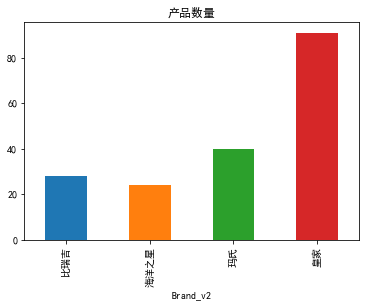

In [51]:
# df_raw_1.groupby('Brand_v2').item_name.count().sort_values(ascending=False).plot(kind='bar')
df_raw_1.groupby('Brand_v2').item_name.count().plot(kind='bar')
plt.title('产品数量')

#### 总销量

In [52]:
pd.core.groupby.SeriesGroupBy?

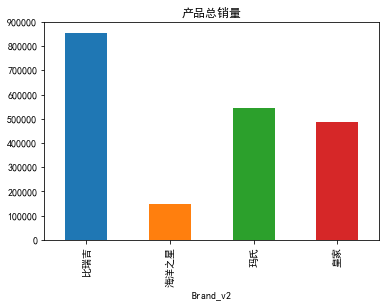

In [53]:
df_raw_1.groupby('Brand_v2').total_sale.sum().plot(kind='bar')
plt.title('产品总销量')

#### 总销售额

In [54]:
df_raw_1['total_amount'] = df_raw_1.price * df_raw_1.total_sale

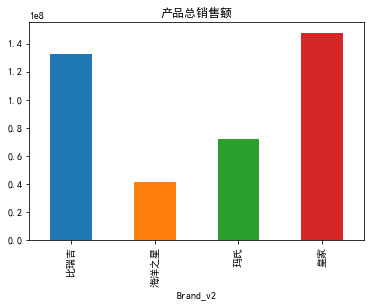

In [55]:
df_raw_1.groupby('Brand_v2').total_amount.sum().plot(kind='bar')
plt.title('产品总销售额')

#### 月销量

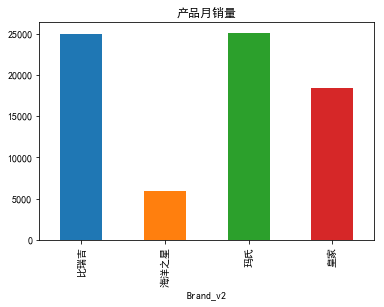

In [56]:
df_raw_1.groupby('Brand_v2').month_sale.sum().plot(kind='bar')
plt.title('产品月销量')

#### 月销售额

In [57]:
df_raw_1['month_amount'] = df_raw_1.price * df_raw_1.month_sale

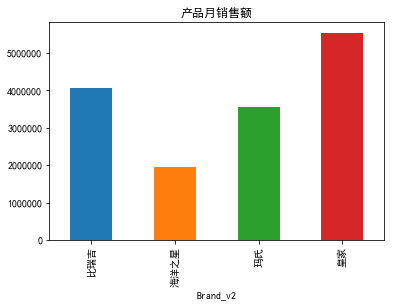

In [58]:
df_raw_1.groupby('Brand_v2').month_amount.sum().plot(kind='bar')
plt.title('产品月销售额')

#### 收藏数

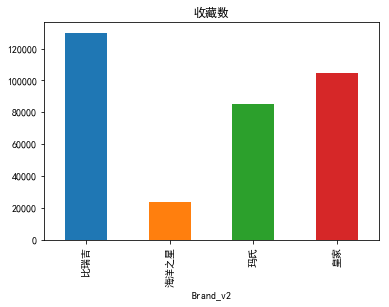

In [59]:
df_raw_1.groupby('Brand_v2').CollectCount.sum().plot(kind='bar')
plt.title('收藏数')

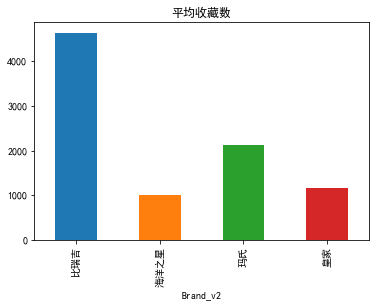

In [60]:
avg_collect = df_raw_1.groupby('Brand_v2').CollectCount.sum()/df_raw_1.groupby('Brand_v2').CollectCount.count()
avg_collect.plot(kind='bar')
plt.title('平均收藏数')

#### 评论数

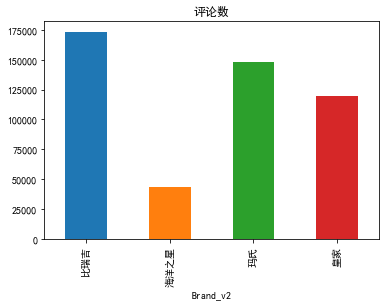

In [61]:
df_raw_1.groupby('Brand_v2').accum_comm.sum().plot(kind='bar')
plt.title('评论数')

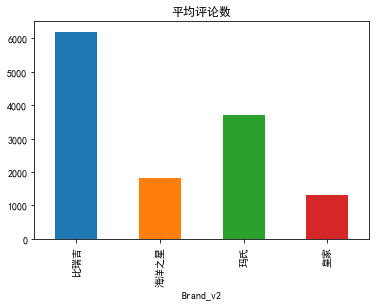

In [63]:
avg_comm = df_raw_1.groupby('Brand_v2').accum_comm.sum()/df_raw_1.groupby('Brand_v2').accum_comm.count()
avg_comm.plot(kind='bar')
plt.title('平均评论数')

# 产品分析

#### 适用种类

In [64]:
hj_class = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').item_name.count()
hj_class

Classification
专用粮    44
奶糕      8
犬粮     39
Name: item_name, dtype: int64

In [65]:
ms_class = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('Classification').item_name.count()
bjr_class = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Classification').item_name.count()
hy_class = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Classification').item_name.count()

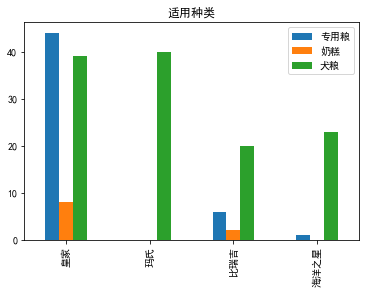

In [66]:
classfication = pd.DataFrame([hj_class,ms_class,bjr_class,hy_class])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用种类')

In [204]:
pd.DataFrame.reset_index?


#### 适用品种

In [67]:
hj_breed = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').item_name.count()
hj_breed

Breed
博美         1
可卡         2
吉娃娃        2
德国牧羊犬      4
拉布拉多       4
斗牛犬        4
日本柴犬       4
比熊         2
约克夏梗       4
西部高地白梗     2
贵宾/泰迪     11
通用型       43
金毛         4
雪纳瑞        4
Name: item_name, dtype: int64

In [68]:
ms_breed = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('Breed').item_name.count()
bjr_breed = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').item_name.count()
hy_breed = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').item_name.count()

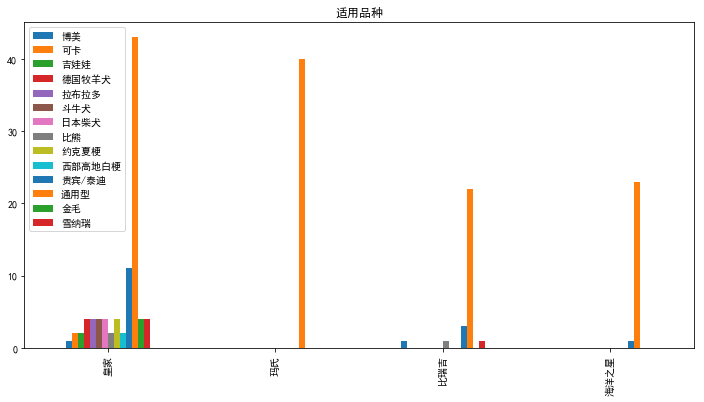

In [69]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
classfication = pd.DataFrame([hj_breed,ms_breed,bjr_breed,hy_breed])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用品种')

#### 适用体型

In [70]:
hj_body = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').item_name.count()
hj_body

BodyType
中型犬     6
大型犬    19
小型犬    38
通用型    28
Name: item_name, dtype: int64

In [71]:
ms_body = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').item_name.count()
bjr_body = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').item_name.count()
hy_body = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').item_name.count()

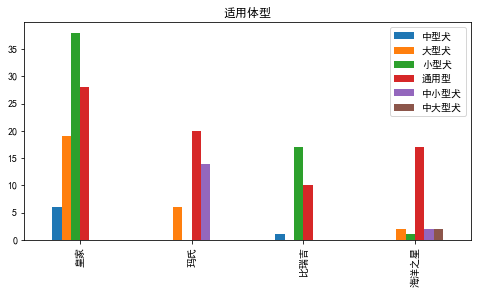

In [72]:
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)
classfication = pd.DataFrame([hj_body,ms_body,bjr_body,hy_body])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用体型')

#### 适用年龄

In [73]:
hj_age = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').item_name.count()
hj_age

ApplicablePhase
使用于怀孕42天起的母犬、哺乳期母犬及2月龄以下离乳期幼犬     4
幼犬                               31
成犬                               43
离乳期                               5
老年犬                               8
Name: item_name, dtype: int64

In [74]:
ms_age = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').item_name.count()
bjr_age = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').item_name.count()
hy_age = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').item_name.count()

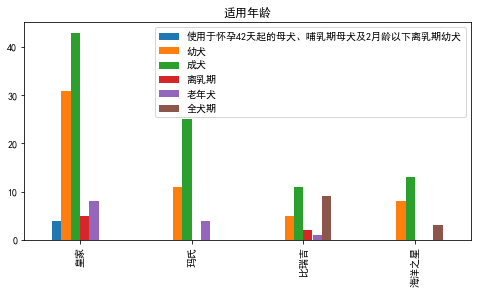

In [75]:
classfication = pd.DataFrame([hj_age,ms_age,bjr_age,hy_age])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用年龄')

#### 口味配方

In [76]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('RecipeTastePrescription_v2').item_name.count()
hj_taste

RecipeTastePrescription_v2
无    91
Name: item_name, dtype: int64

In [77]:
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()

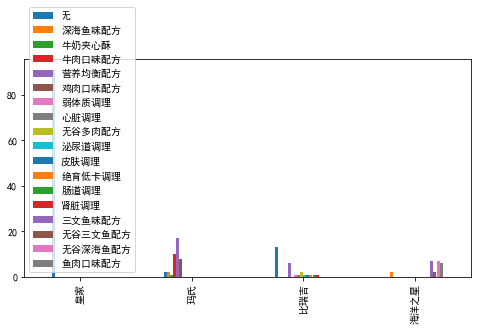

In [78]:
classfication = pd.DataFrame([hj_taste,ms_taste,bjr_taste,hy_taste])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')

In [112]:
pd.DataFrame.plot?

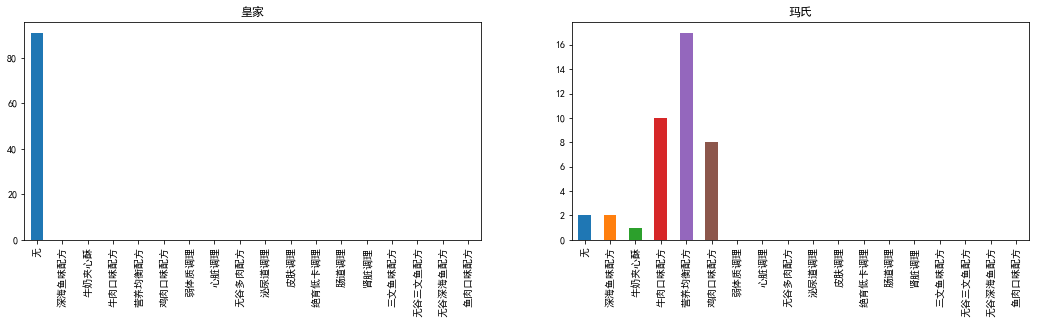

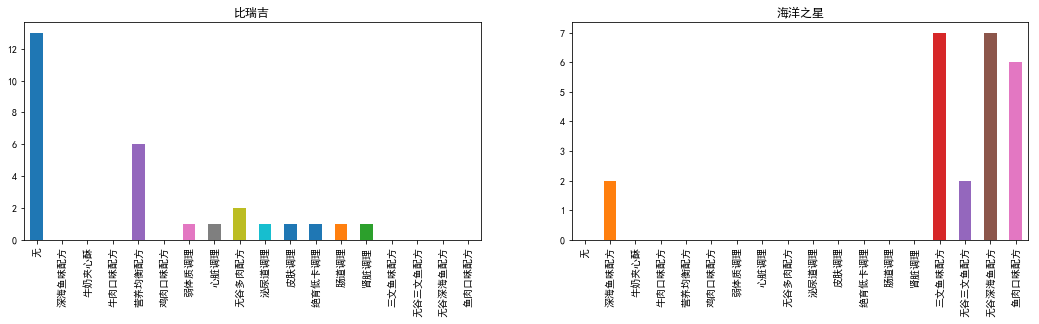

In [79]:
classfication = pd.DataFrame([hj_taste,ms_taste,bjr_taste,hy_taste])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
plt.figure(1,figsize = (18,4))
plt.subplot(121)
classfication.T['皇家'].plot(kind = 'bar')
plt.title('皇家')
plt.subplot(122)
classfication.T['玛氏'].plot(kind = 'bar')
plt.title('玛氏')
plt.figure(2,figsize = (18,4))
plt.subplot(121)
classfication.T['比瑞吉'].plot(kind = 'bar')
plt.title('比瑞吉')
plt.subplot(122)
classfication.T['海洋之星'].plot(kind = 'bar')
plt.title('海洋之星')


In [51]:
plt.bar?

对于皇家的细分析品种狗粮，销量情况如何？

皇家最大的特色- 狗狗种类齐全

In [115]:
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription', 'item_name_cut',
       'RecipeTastePrescription_v2', 'Brand_v2', 'month_amount'],
      dtype='object')

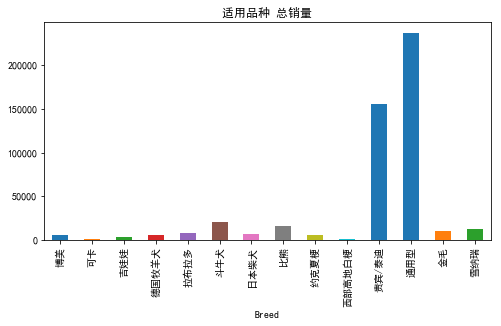

In [80]:
hj_breed_sale = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').total_sale.sum()#.plot(kind ='bar')
hj_breed_sale.plot(kind ='bar')
plt.title('适用品种 总销量')

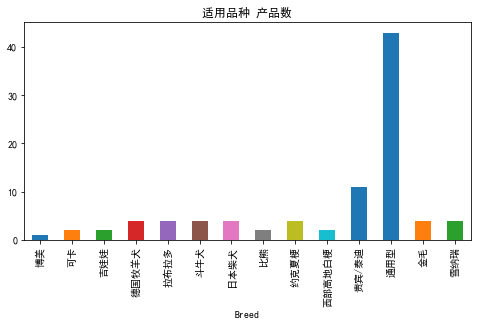

In [81]:
hj_breed = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').item_name.count()#.plot(kind ='bar')
hj_breed.plot(kind ='bar')
plt.title('适用品种 产品数')

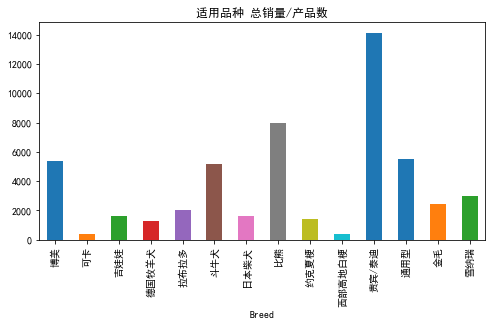

In [82]:
hj_breed_avg_sale =hj_breed_sale/hj_breed
hj_breed_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

狗粮种类

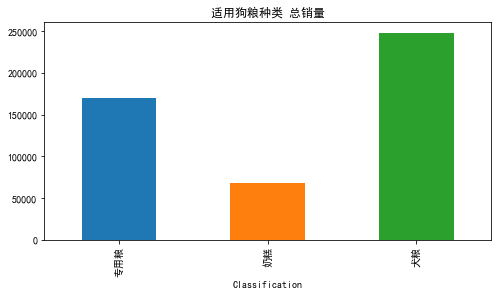

In [86]:
hj_classifi_sale = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').total_sale.sum()#.plot(kind ='bar')
hj_classifi_sale.plot(kind ='bar')
plt.title('适用狗粮种类 总销量')


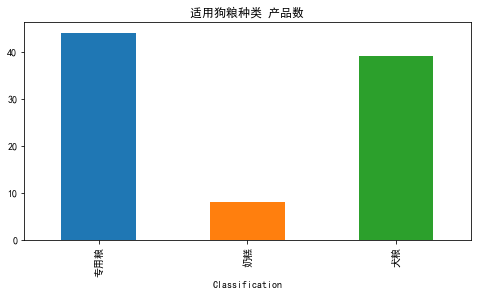

In [88]:
hj_classifi = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').item_name.count()#.plot(kind ='bar')
hj_classifi.plot(kind ='bar')
plt.title('适用狗粮种类 产品数')

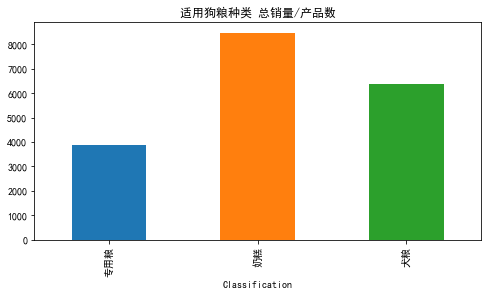

In [90]:
hj_classifi_avg_sale =hj_classifi_sale/hj_classifi
hj_classifi_avg_sale.plot(kind ='bar')
plt.title('适用狗粮种类 总销量/产品数')

比瑞吉的配方粮哪个最畅销？

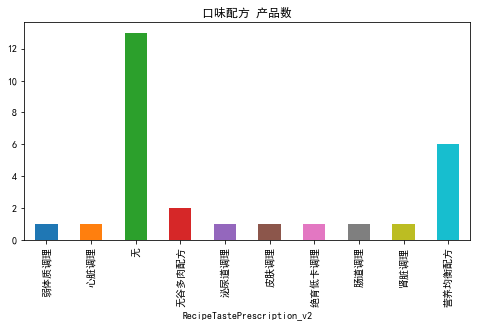

In [95]:
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()#
bjr_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

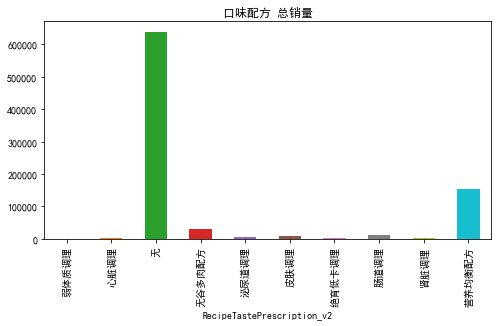

In [96]:
bjr_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
bjr_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

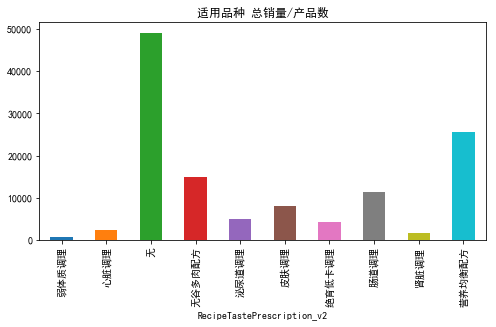

In [97]:
bjr_taste_avg_sale =bjr_taste_sale/bjr_taste
bjr_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

玛氏的什么口味配方最受欢迎？

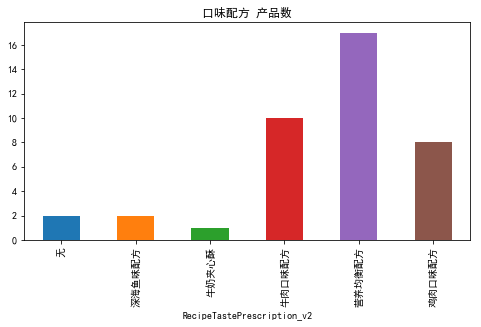

In [91]:
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()#
ms_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

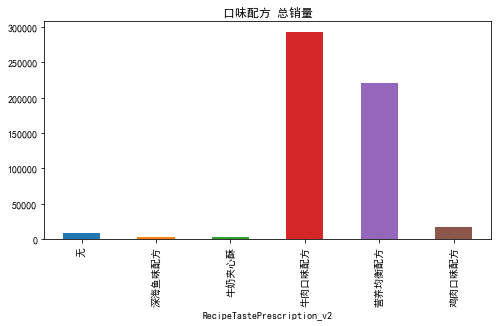

In [92]:
ms_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
ms_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

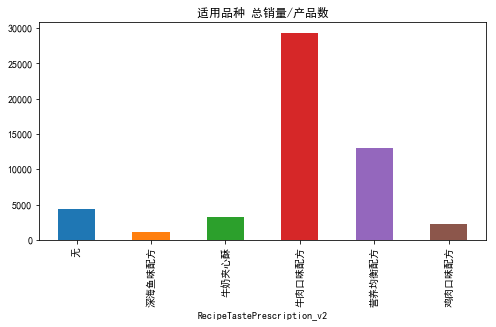

In [98]:
ms_taste_avg_sale =ms_taste_sale/ms_taste
ms_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

海洋之星

In [105]:
# matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)

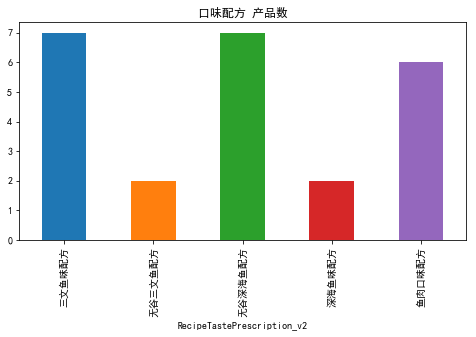

In [106]:
hyzx_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()#
hyzx_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

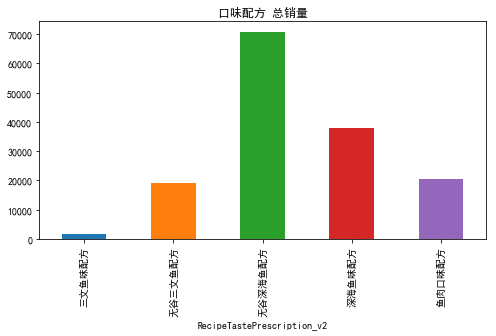

In [100]:
hyzx_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
hyzx_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

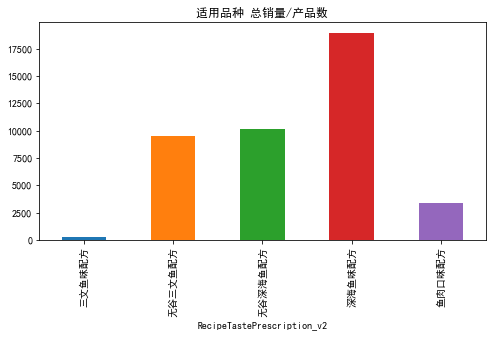

In [101]:
hyzx_taste_avg_sale =hyzx_taste_sale/hyzx_taste
hyzx_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

练习：针对适用狗狗体型和适用狗狗年龄，不同品牌的表现如何？

# 价格分析 

In [113]:
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription', 'item_name_cut',
       'RecipeTastePrescription_v2', 'Brand_v2', 'total_amount',
       'month_amount'],
      dtype='object')

In [114]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('RecipeTastePrescription_v2').item_name.count()
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()

In [115]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].price
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏']
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉']
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星']

In [117]:
hj_avg_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.count()

In [118]:
df_avg_price =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
         "avg_score":[df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.count()]}    )

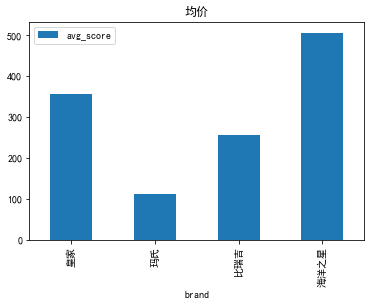

In [119]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_avg_price.set_index("brand").plot(kind ="bar")
plt.title('均价')

In [120]:
df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight.sum()

0.05871469949312093

In [121]:
df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight.sum()

0.029263199369582348

In [122]:
df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight.sum()

0.0615982905982906

In [123]:
df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight.sum()

0.07773401534526854

In [124]:
df_avg_price_per_w =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
         "avg_score":[df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight.sum()]}    )

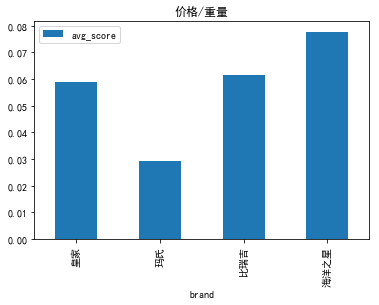

In [125]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_avg_price_per_w.set_index("brand").plot(kind ="bar")
plt.title('价格/重量')

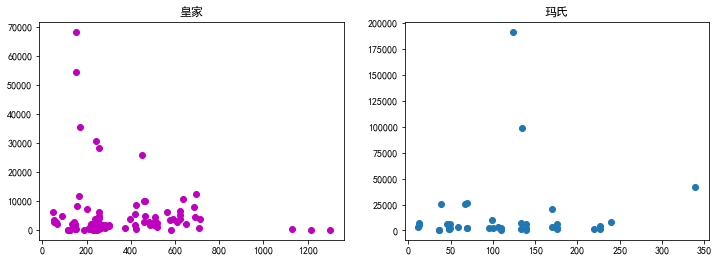

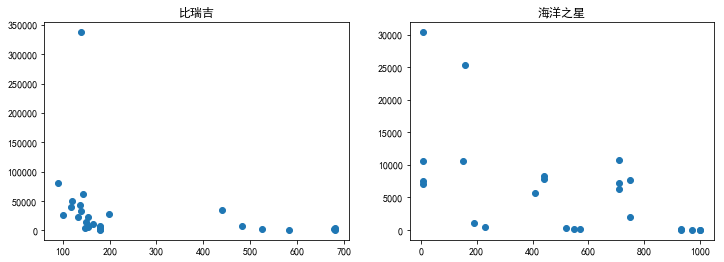

In [129]:
plt.figure(1,figsize = (12,4))
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,color = 'm',label='皇家')
plt.title('皇家')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale)
plt.title('玛氏')
plt.figure(2,figsize = (12,4))
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale)
plt.title('比瑞吉')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale)
plt.title('海洋之星')

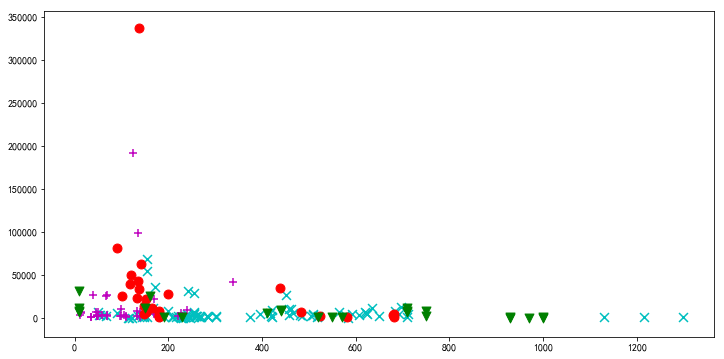

In [130]:
plt.figure(1,figsize = (12,6))
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,marker = 'x',color = 'c',label='皇家',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale,marker = '+',color = 'm', label='玛氏',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale,marker = 'o',color = 'r', label='比瑞吉',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale,marker = 'v',color = 'g', label='海洋之星',s=80)

In [170]:
plt.scatter？

SyntaxError: invalid character in identifier (<ipython-input-170-48946ecd45c5>, line 1)

价格-口味配方

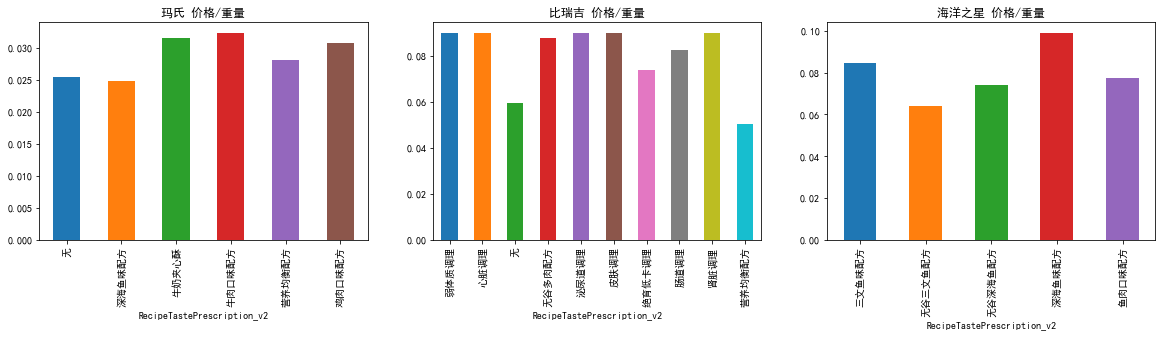

In [136]:
plt.figure(1,figsize = (20,4))
plt.subplot(131)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')
plt.subplot(132)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(133)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

In [ ]:
Breed

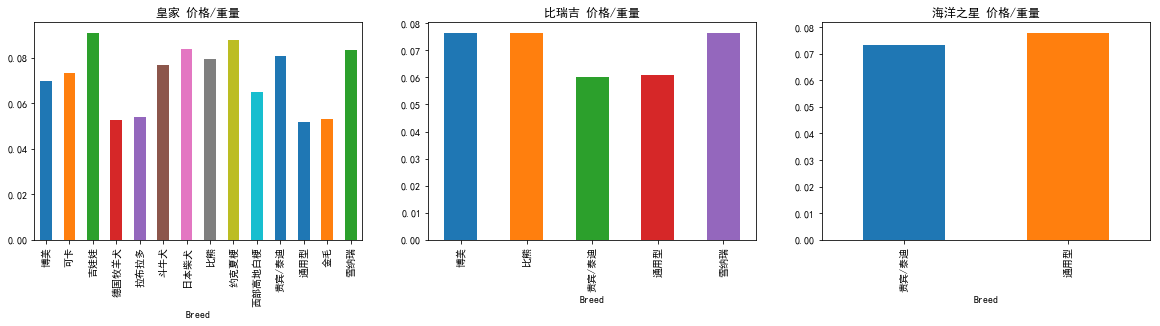

In [149]:
plt.figure(1,figsize = (20,4))
plt.subplot(131)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(132)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(133)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

价格 - 适用体型

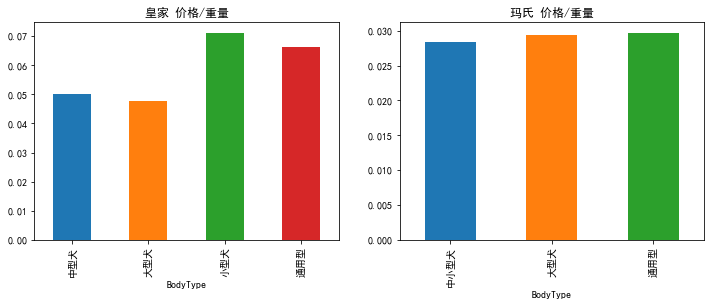

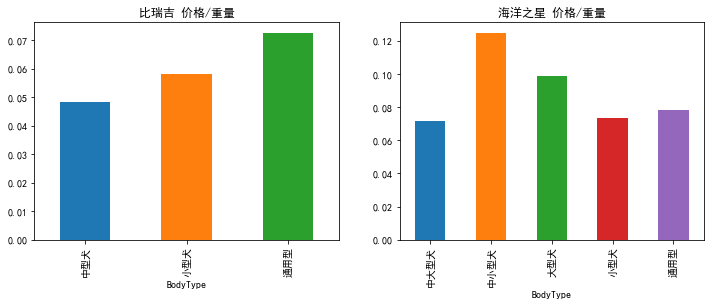

In [145]:
plt.figure(1,figsize = (12,4))
plt.subplot(121)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(122)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')
plt.figure(2,figsize = (12,4))       
plt.subplot(121)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(122)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

价格 - 适用年龄

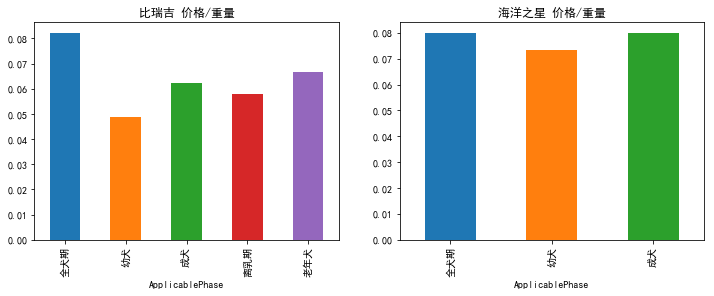

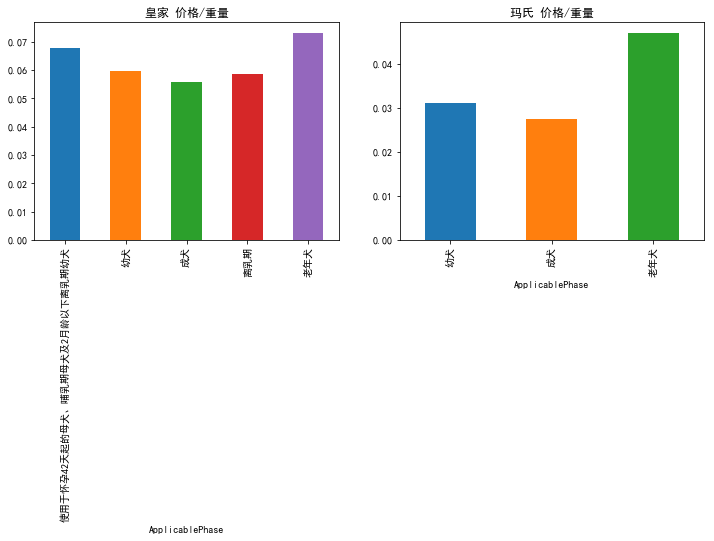

In [147]:
plt.figure(1,figsize = (12,4))       
plt.subplot(121)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(122)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')
plt.figure(2,figsize = (12,4))
plt.subplot(121)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(122)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')


# 数据处理（二）

In [209]:
df_raw_2 = pd.read_excel('Product_comments_rawdata.xlsx') # 96,531 rows x 22 columns
df_raw_2.columns

Index(['brand', 'cmsSource', 'sellerId', 'item_id', 'id', 'displayUserNick',
       'rateContent', 'pics_0', 'pics_1', 'pics_2', 'pics_3', 'pics_4',
       'rateDate', 'reply', 'content', 'commentTime', 'tamllSweetLevel',
       'tradeEndTime'],
      dtype='object')

In [207]:
len(df_raw_2)

30

In [213]:
print("min comment time:", min(df_raw_2.rateDate))
print("max comment time:",max(df_raw_2.rateDate))

min comment time: 2016-03-27 07:11:10
max comment time: 2018-03-31 21:35:11


In [755]:
df_raw_2.head(2)

,brand,cmsSource,sellerId,item_id,id,displayUserNick,goldUser,gmtCreateTime,rateContent,pics_0,...,pics_3,pics_4,rateDate,reply,content,commentTime,days,tamllSweetLevel,tmallSweetPic,tradeEndTime
0,royalcanin,天猫,1728261286,19045209534,342988772811,万***娆,True,2018-03-16 10:42:18,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,//img.alicdn.com/bao/uploaded/i3/0/TB2yRxwa_qW...,...,NaN,NaN,2018-03-16 18:42:18,NaN,NaN,NaT,NaN,0,NaN,2018-03-16 10:39:49
1,royalcanin,天猫,1728261286,19045209534,343864372011,水***7,False,2018-03-24 09:22:00,闻起来有种奶味～还不错。,//img.alicdn.com/bao/uploaded/i4/0/TB2E2NrfYSY...,...,NaN,NaN,2018-03-24 17:22:00,NaN,NaN,NaT,NaN,0,NaN,2018-03-21 14:26:20


In [756]:
df_raw_2[['rateContent','content']].head(10)

,rateContent,content
0,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,NaN
1,闻起来有种奶味～还不错。,NaN
2,我们小红包很爱吃，?也很正常。第一天没有泡够时间，吃吐了。不过后来就好了。就是有点贵，别的没...,NaN
3,此用户没有填写评论!,差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和...
4,靠谱 打开很香不腥,NaN
5,东西蛮不错的，希望能有用，我的德牧也很爱吃。,NaN
6,很好，包装扎实，品牌信得过,NaN
7,划算～多做活动呀～狗狗爱吃…不过我们家狗狗也是真的不挑食了…简直什么都想吃,NaN
8,第二次买,NaN
9,宝贝买的很划算，其他就不评价了,NaN


In [757]:
df_raw_2['rateContent'][3]

'此用户没有填写评论!'

In [758]:
# " ".join(aaa) list 合并连接字符串的方法
aaa=['stt','hiud']
bbb=[]
content = " ".join(aaa)
bbb.append(content)
bbb

['stt hiud']

In [759]:
Comment = []
for i in range(len(df_raw_2)):
    if df_raw_2.rateContent[i] == '此用户没有填写评论!' and not pd.isnull(df_raw_2.content[i]) :
        Comment.append(df_raw_2.content[i])
    elif df_raw_2.rateContent[i] == '此用户没有填写评论!':
        Comment.append('')
    elif not pd.isnull(df_raw_2.content[i]):
        Comment.append(" ".join([str(df_raw_2.rateContent[i]),str(df_raw_2.content[i])])) 
    else:
        Comment.append(df_raw_2.rateContent[i])
    

In [761]:
len(Comment)

96531

In [762]:
Comment[0:500]

['第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗',
 '闻起来有种奶味～还不错。',
 '我们小红包很爱吃，?也很正常。第一天没有泡够时间，吃吐了。不过后来就好了。就是有点贵，别的没毛病。不过好像没有送狗粮产，不开心。跟店家说了小狗等着吃，当天就给发货了，大过年的谢谢了！',
 '差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和鸡肉吃了4天，狗狗不拉稀了，我以为是第一袋开了太长时间于是就把第一袋剩余的狗粮扔了，打开了第二袋，第二代吃了两天之后狗狗又开始拉稀，我觉得应该是狗粮有问题，请大家慎重购买。',
 '靠谱 打开很香不腥',
 '东西蛮不错的，希望能有用，我的德牧也很爱吃。',
 '很好，包装扎实，品牌信得过',
 '划算～多做活动呀～狗狗爱吃…不过我们家狗狗也是真的不挑食了…简直什么都想吃',
 '第二次买',
 '宝贝买的很划算，其他就不评价了',
 '第二袋了，赶上双11买一袋备着先，包装完好，好评先',
 '12公斤包装很好，还未吃追评吧。',
 '双十一的价格很实惠，快递也给力',
 '多次买了',
 '傻狗喜欢',
 '我家德牧第一天很爱吃，可这几天不怎么爱吃，不知怎么回事？',
 '这是第二袋了，狗狗吃了毛色蛮好的，其他暂时还不知道',
 '一直买，挺好的，就是总断货，抢到一次不容易',
 '外面箱子写的是英短猫粮。。。吓死，以为这么重，要退回去。 。。。打开一看，幸好没错。自己尝了一下，很香，口感也挺好，而且确实有股鱼虾的鲜腥味，不知道是不是发现了什么',
 '正在吃，单独吃狗粮会拉稀而且很臭，可能我狗狗不太适应狗粮。后期追评。',
 '狗狗不喜欢吃！！！习惯好评而已',
 '还行。不错。',
 '和我平时买的我个人认为还是有点小区别的 首先颜色对比 不愿来的浅还有 狗粮很湿一样 搞的我还买了4大袋呢',
 '寄来的是成犬又要寄回去再换…希望发货能进行复查，这样的大件寄来寄去非常不方便…',
 '跟平时买的好像不太一样',
 '好大一袋这样不好保存吧？而且也没有赠品待遇还不一样，而且狗狗吃了几次就不爱吃了。',
 '回购',
 '可以',
 '可以',
 '很好',
 '挺好',
 '爱吃',
 '还行。不错。',
 '数量足',
 '东西很好，连续2

In [763]:
df_raw_2['Comment']=Comment

In [764]:
len(df_raw_2[df_raw_2.Comment== ''])

442

In [765]:
jieba.load_userdict('AddWords.txt')
Comment_cut=[]
for i in df_raw_2.Comment:
    j=jieba.lcut(str(i))
    Comment_cut.append(j)

In [766]:
df_raw_2['Comment_cut'] =Comment_cut

In [767]:
df_raw_2.head(1)

,brand,cmsSource,sellerId,item_id,id,displayUserNick,goldUser,gmtCreateTime,rateContent,pics_0,...,rateDate,reply,content,commentTime,days,tamllSweetLevel,tmallSweetPic,tradeEndTime,Comment,Comment_cut
0,royalcanin,天猫,1728261286,19045209534,342988772811,万***娆,True,2018-03-16 10:42:18,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,//img.alicdn.com/bao/uploaded/i3/0/TB2yRxwa_qW...,...,2018-03-16 18:42:18,NaN,NaN,NaT,NaN,0,NaN,2018-03-16 10:39:49,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,"[第二次, 购买, ，, 可以, 说, 营养, 很好, 了, 。, 狗子, 长得, 不, 像..."


# 评论概况

In [768]:
df_raw_2.brand.value_counts()

royalcanin    31377
biruiji       29292
marspet       21894
fish4dogs     13968
Name: brand, dtype: int64

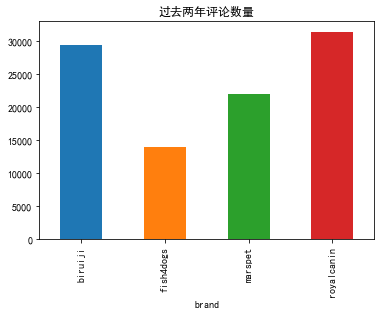

In [775]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_raw_2.groupby('brand').Comment.count().plot(kind='bar')
plt.title('过去两年评论数量')

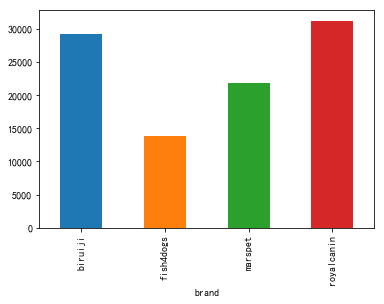

In [774]:
df_raw_2[df_raw_2['Comment']!=''].groupby('brand').Comment.count().plot(kind='bar')

# 评论文本挖掘

In [776]:
from wordcloud import WordCloud

In [777]:
comm_hj = df_raw_2[df_raw_2['brand'] =='royalcanin']['Comment_cut']
len(comm_hj)

31377

In [778]:
type(comm_hj)

pandas.core.series.Series

In [779]:
comm_hj

0        [第二次, 购买, ，, 可以, 说, 营养, 很好, 了, 。, 狗子, 长得, 不, 像...
1                             [闻, 起来, 有种, 奶味, ～, 还, 不错, 。]
2        [我们, 小, 红包, 很, 爱吃, ，, ?, 也, 很, 正常, 。, 第一天, 没有,...
3        [差评, ！, 差评, ！, 差评, ！, 当时, 一次, 买, 了, 两袋, ，, 第一,...
4                                    [靠, 谱,  , 打开, 很香, 不腥]
5        [东西, 蛮, 不错, 的, ，, 希望, 能, 有用, ，, 我, 的, 德牧, 也, 很...
6                              [很好, ，, 包装, 扎实, ，, 品牌, 信得过]
7        [划算, ～, 多, 做, 活动, 呀, ～, 狗狗, 爱吃, …, 不过, 我们, 家, ...
8                                                 [第二次, 买]
9                      [宝贝, 买, 的, 很, 划算, ，, 其他, 就, 不评价, 了]
10       [第二袋, 了, ，, 赶上, 双11, 买, 一袋, 备着, 先, ，, 包装, 完好, ...
11                  [12, 公斤, 包装, 很好, ，, 还, 未, 吃, 追评, 吧, 。]
12                     [双十一, 的, 价格, 很, 实惠, ，, 快递, 也, 给, 力]
13                                              [多次, 买, 了]
14                                                [傻狗, 喜欢]
15       [我家, 德牧, 第一天, 很, 爱吃, ，, 可, 这, 几天, 不怎么, 爱吃, ，, ...
16       [这是, 第二袋, 了, ，, 狗狗, 吃, 了, 毛色, 蛮好, 的, ，, 其他, 暂时.

In [780]:
comm_hj_v2=[]
for i in range(len(comm_hj)):
    comm_hj_v2 =comm_hj_v2 +comm_hj[i]

In [781]:
len(comm_hj_v2)

430050

In [782]:
words_df = pd.DataFrame({'segment': comm_hj_v2})

In [788]:
words_df.head(100)

,segment
0,第二次
1,购买
2,，
3,可以
4,说
5,营养
6,很好
7,了
8,。
9,狗子


In [784]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [785]:
# 生成词云图，WordCloud默认不支持中文，需要自己下载好中文字库
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80)
word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}
word_frequence_list=[]
for key in word_frequence:
    temp = (key, word_frequence[key])
    word_frequence_list.append(temp)



{'，': 37535, '的': 18997, '了': 15844, '吃': 13779, ' ': 10854, '。': 10428, '狗狗': 9293, '！': 7423, '买': 6767, '很': 6550, '好': 6443, '狗粮': 5067, '喜欢': 4740, '一直': 4665, '不错': 4115, '爱吃': 3987, '还': 3964, '是': 3723, '很好': 3383, '都': 3277, '也': 3168, '我家': 3093, '就': 3002, '不': 2852, '我': 2720, '这个': 2504, '在': 2307, '给': 2188, '皇家': 2149, '没': 2038, '挺': 1957, '好评': 1711, '没有': 1666, '非常': 1659, '送': 1595, '?': 1479, '…': 1453, '就是': 1381, '购买': 1357, '有': 1345, '双十一': 1306, '宝贝': 1276, '正品': 1232, '狗': 1168, '满意': 1154, '快': 1131, '活动': 1131, '物流': 1101, '可以': 1093, '再': 1093, '发货': 1090, '希望': 1070, '还是': 1060, '～': 1046, '到': 1017, '知道': 997, '收到': 967, '东西': 964, '一如既往': 945, '快递': 933, '大': 923, '很快': 917, '这次': 901, '啦': 890, '多': 876, '包装': 875, '说': 869, '来': 852, '吧': 834, '之前': 829, '会': 801, '换': 793, '好好': 792, '划算': 789, '狗子': 782, '这': 779, '以后': 777, '但是': 758, '有点': 755, '和': 741, '多次': 737, '它': 733, '第二次': 720, '价格': 712, '家里': 707, '现在': 704, '特别': 693, '客服': 686, '完': 68

In [789]:
print(word_frequence)
print(word_frequence_list)

{'，': 37535, '的': 18997, '了': 15844, '吃': 13779, ' ': 10854, '。': 10428, '狗狗': 9293, '！': 7423, '买': 6767, '很': 6550, '好': 6443, '狗粮': 5067, '喜欢': 4740, '一直': 4665, '不错': 4115, '爱吃': 3987, '还': 3964, '是': 3723, '很好': 3383, '都': 3277, '也': 3168, '我家': 3093, '就': 3002, '不': 2852, '我': 2720, '这个': 2504, '在': 2307, '给': 2188, '皇家': 2149, '没': 2038, '挺': 1957, '好评': 1711, '没有': 1666, '非常': 1659, '送': 1595, '?': 1479, '…': 1453, '就是': 1381, '购买': 1357, '有': 1345, '双十一': 1306, '宝贝': 1276, '正品': 1232, '狗': 1168, '满意': 1154, '快': 1131, '活动': 1131, '物流': 1101, '可以': 1093, '再': 1093, '发货': 1090, '希望': 1070, '还是': 1060, '～': 1046, '到': 1017, '知道': 997, '收到': 967, '东西': 964, '一如既往': 945, '快递': 933, '大': 923, '很快': 917, '这次': 901, '啦': 890, '多': 876, '包装': 875, '说': 869, '来': 852, '吧': 834, '之前': 829, '会': 801, '换': 793, '好好': 792, '划算': 789, '狗子': 782, '这': 779, '以后': 777, '但是': 758, '有点': 755, '和': 741, '多次': 737, '它': 733, '第二次': 720, '价格': 712, '家里': 707, '现在': 704, '特别': 693, '客服': 686, '完': 68

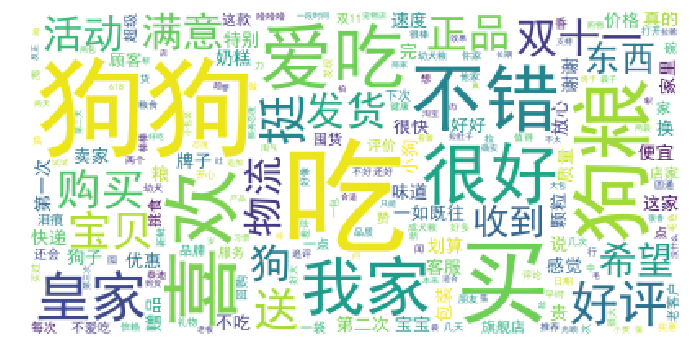

In [803]:
# 显示图片
plt.rcParams['figure.figsize'] = (12.0,6.0)
wordcloud = wordcloud.fit_words(dict(word_frequence_list))
plt.imshow(wordcloud)   # 以图片形式显示词云
plt.axis('off')     # 关闭图像坐标系
plt.show()
# plt.savefig('plot123_1.png', dpi=1200)

In [138]:
# from IPython.core.pylabtools import figsize
# figsize(12.5, 4)
# plt.rcParams['figure.dpi'] = 100 #分辨率
# plt.rcParams['savefig.dpi'] = 100 #图片像素

In [ ]:
- 很多干扰词存在，且词频很高
- 图片像素不够清晰

###### 引入停用词

In [791]:
stopwords = pd.read_csv('stopwords.txt', index_col=False, quoting=3, sep='\t', names=['stopword'],
                        encoding='utf-8')  # quoting=3全不引用


In [6]:
type(stopwords)

pandas.core.frame.DataFrame

In [792]:
stopwords.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [793]:
stopwords_list = stopwords.values

In [794]:
type(stopwords_list)

numpy.ndarray

In [795]:
stopwords_list[0:5]

array([['!'],
       ['"'],
       ['#'],
       ['$'],
       ['%']], dtype=object)

In [796]:
# 定义另一个变换list形式的函数
def list2_list(list_list, list):
    for item in list_list:
        list_item = item[0]
        list.append(list_item)
    return list

In [797]:
stopwords_list = list2_list(stopwords_list, [])

In [798]:
stopwords_list[0:5]

['!', '"', '#', '$', '%']

In [799]:
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
len(words_df)

206435

In [800]:
len(comm_hj_v2)

430050

c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


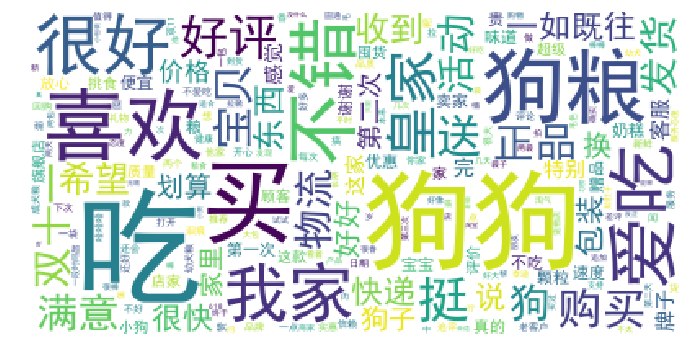

In [804]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)
# 生成词云图，
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80)
word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}
word_frequence_list=[]
for key in word_frequence:
    temp = (key, word_frequence[key])
    word_frequence_list.append(temp)

# 显示图片
wordcloud = wordcloud.fit_words(dict(word_frequence_list))
plt.imshow(wordcloud)   # 以图片形式显示词云
plt.axis('off')     # 关闭图像坐标系
plt.show()

c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


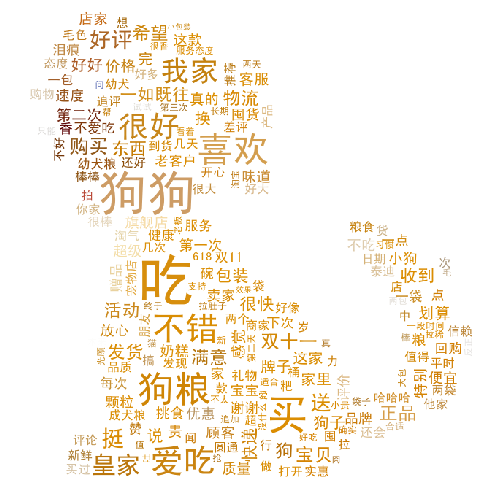

In [805]:
# 自定义显示词云图形状
from wordcloud import WordCloud,ImageColorGenerator
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# from scipy.misc import imread
# bimg=imread('image/dog_1.jpg')
# `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
import imageio
bimg = imageio.imread('image/dog_1.jpg')

words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=80,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(300).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_hj.png')

In [806]:
comm_brj = df_raw_2[df_raw_2['brand'] =='biruiji']['Comment_cut']
len(comm_brj)

29292

In [817]:
comm_brj_v2=[]
for i in range(len(comm_brj)):
        comm_brj_v2 =comm_brj_v2 +comm_brj[i]

In [811]:
comm_brj[0]

KeyError: 0

In [812]:
comm_brj

53271    [宝贝, 收到, 啦, ，, 不错, 跟, 家里, 的, 一模一样, ，, 这, 是, 给,...
53272                            [我家, 的, 斗牛, 是, 个, 贪吃鬼, ?]
53273                [包装, 严实, 、, 发货, 及时, 、, 吃, 完, 再, 来, ！]
53274    [狗粮, 非常, 的, 香, ，, 感谢, 客服, 赠送, 的, 试, 吃粮, 。, 泰迪,...
53275                          [胖子, 吃, ，, 小, 一点, 能, 好, 消化]
53276                                     [毛孩子, 超级, 喜欢, 吃]
53277    [很大, 包, ，, 我们, 家, 小狗, 能, 吃, 到, 下, 一面, 双十一, 了, ...
53278                                           [可, 喜欢, 了]
53279    [家里, 又, 添, 了, 小狗, 宝, ，, 大, 狗宝, 小时, 也, 吃, 的, 比瑞...
53280                [我们, 家, 狗狗, 不好, 好吃, 狗粮, ，, 买, 奶糕, 试试]
53281        [我家, 狗狗, 已经, 吃, 这款, 狗粮, 好多年, 了, ，, 它们, 很, 喜欢]
53282                               [我家, 一直, 吃, 这个,  , 爱吃]
53283                                   [我家, 基超, 喜欢, 吃, ，]
53284    [双十一, 期间, 买, 的, ，, 过, 了, 好久, 才, 收到, ，, 没, 办法, ...
53285    [我, 的, 天呐, ，, 那么, 大, 一包, ，, 你, 可以, 想象, 吗, ，, 我...
53286    [物流, 真的, 是, 超级, 慢, ，, 害, 得, 我家, 两只, 狗, 断粮, 了, ...
53287               [试用装, 日期, 新鲜, ，, 春游, 外出, 携带, ，, 很, 方

In [815]:
comm_brj =comm_brj.reset_index(drop =True)

In [818]:
len(comm_brj_v2)

415782

In [819]:
comm_brj_v2[0:10]

['宝贝', '收到', '啦', '，', '不错', '跟', '家里', '的', '一模一样', '，']

In [820]:
stop = [' ','N']
comm_brj_v3 = [w for w in comm_brj_v2 if(w not in stop)]
len(comm_brj_v3)

405541

In [821]:
words_df = pd.DataFrame({'segment': comm_brj_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_brj_v3))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

Brfore Stopwords:  405541
After Stopwords:  189441


c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


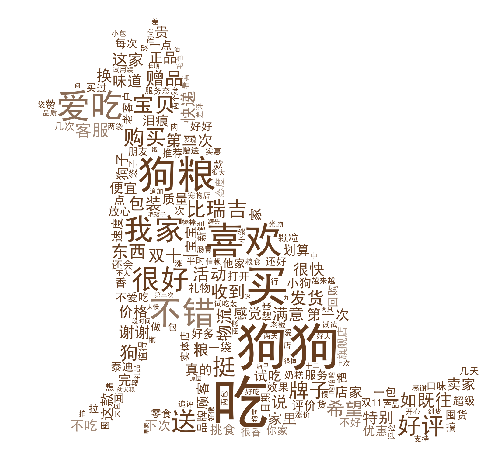

In [822]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_2.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=200,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_brj.png')

In [823]:
word_frequence

{'吃': 13630,
 '狗狗': 9952,
 '买': 7072,
 '狗粮': 5402,
 '喜欢': 5008,
 '爱吃': 3929,
 '不错': 3832,
 '我家': 3146,
 '很好': 2800,
 '送': 2324,
 '好评': 1884,
 '挺': 1884,
 '宝贝': 1578,
 '购买': 1502,
 '比瑞吉': 1405,
 '牌子': 1319,
 '赠品': 1118,
 '狗': 1105,
 '希望': 1069,
 '东西': 979,
 '一如既往': 977,
 '发货': 955,
 '活动': 954,
 '收到': 951,
 '客服': 944,
 '物流': 899,
 '双十一': 885,
 '包装': 866,
 '快递': 844,
 '说': 824,
 '这家': 813,
 '谢谢': 786,
 '粮': 777,
 '满意': 767,
 '特别': 760,
 '第二次': 759,
 '很快': 756,
 '换': 751,
 '味道': 667,
 '卖家': 652,
 '价格': 650,
 '家里': 639,
 '这款': 622,
 '第一次': 618,
 '正品': 615,
 '感觉': 614,
 '完': 602,
 '顾客': 566,
 '狗子': 564,
 '店家': 561,
 '贵': 558,
 '便宜': 554,
 '试吃': 553,
 '不吃': 545,
 '真的': 526,
 '家': 517,
 '宝宝': 512,
 '泪痕': 496,
 '划算': 491,
 '下次': 466,
 '质量': 454,
 '挑食': 453,
 '优惠': 442,
 '速度': 439,
 '小狗': 429,
 '评价': 425,
 '香': 414,
 '一袋': 398,
 '好多': 394,
 '一包': 380,
 '服务': 377,
 '回购': 375,
 '不爱吃': 365,
 '旗舰店': 361,
 '囤货': 353,
 '闻': 345,
 '品牌': 343,
 '一点': 342,
 '好好': 342,
 '礼物': 337,
 '泰迪': 334,
 '超级': 331,
 

Counts of Comment:  21894
Brfore Stopwords:  309216
After Stopwords:  140923


c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


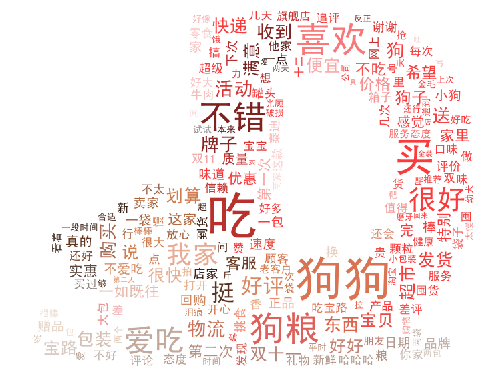

In [824]:
comm_ms = df_raw_2[df_raw_2['brand'] =='marspet']['Comment_cut']
print("Counts of Comment: ",len(comm_ms))
comm_ms =comm_ms.reset_index(drop =True)
comm_ms_v2=[]
for i in range(len(comm_ms)):
        comm_ms_v2 =comm_ms_v2 +comm_ms[i]
comm_ms_v3 = [w for w in comm_ms_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_ms_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_ms_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_3.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=80,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_ms.png',api=1200)

Counts of Comment:  13968
Brfore Stopwords:  228567
After Stopwords:  103818


c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


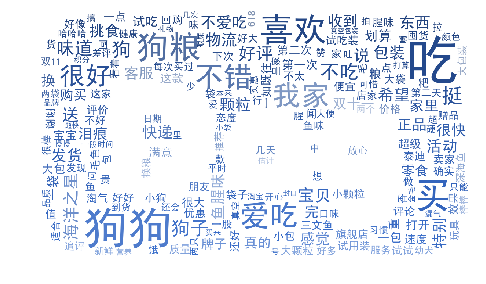

In [825]:
comm_hyzx = df_raw_2[df_raw_2['brand'] =='fish4dogs']['Comment_cut']
print("Counts of Comment: ",len(comm_hyzx))
comm_hyzx =comm_hyzx.reset_index(drop =True)
comm_hyzx_v2=[]
for i in range(len(comm_hyzx)):
        comm_hyzx_v2 =comm_hyzx_v2 +comm_hyzx[i]
comm_hyzx_v3 = [w for w in comm_hyzx_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_hyzx_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_hyzx_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_4.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=150,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_hyzx.png',api=1200)

Counts of Comment:  96531
Brfore Stopwords:  197519
After Stopwords:  89491


c:\users\zhhu\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if sys.path[0] == '':


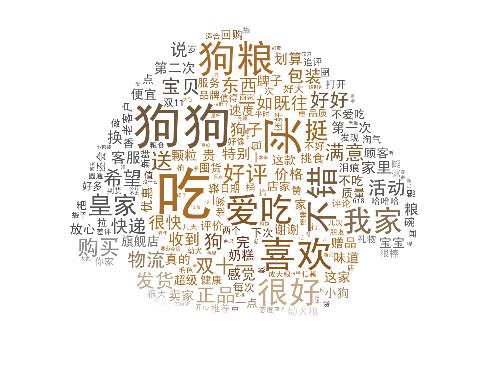

In [826]:
comm_total = df_raw_2['Comment_cut']
print("Counts of Comment: ",len(comm_total))
comm_total_v2=[]
for i in range(len(comm_hyzx)):
        comm_total_v2 =comm_total_v2 +comm_total[i]
comm_total_v3 = [w for w in comm_total_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_total_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_total_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_5.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=120,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(300).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_total.png',api=1200)

In [373]:
type(word_frequence)

dict

###### TF-IDF --提取关键词

In [827]:
df_comm = df_raw_2.Comment.astype('str')
lines=df_comm.values.tolist()
# lines_v2 = [w for w in lines if(w not in stop)]
content = "".join(lines)

In [828]:
lines[6440]

'666666666666'

In [829]:
len(content)

2098585

In [831]:
print( "  ".join(analyse.extract_tags(content, topK=80, withWeight=False, allowPOS=())))

狗狗  狗粮  爱吃  喜欢  不错  我家  很好  一直  好评  双十一  发货  宝贝  快递  这个  狗子  正品  牌子  物流  购买  一如既往  划算  非常  包装  客服  赠品  收到  满意  不吃  比瑞吉  不爱吃  好好  这次  挑食  希望  活动  皇家  没有  味道  卖家  东西  很快  就是  这家  第二次  多次  便宜  之前  还是  店家  有点  知道  小狗  试吃  家里  泪痕  可以  这款  一袋  谢谢  宝宝  感觉  以后  双11  颗粒  囤货  特别  下次  第一次  优惠  一包  旗舰店  但是  奶糕  顾客  真的  超级  以前  泰迪  回购  价格


In [832]:
print( "  ".join(analyse.extract_tags(content, topK=80, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))))

狗狗  喜欢  好评  发货  快递  狗子  正品  牌子  物流  购买  划算  包装  客服  赠品  收到  满意  不吃  挑食  希望  活动  皇家  没有  味道  卖家  东西  店家  有点  知道  试吃  泪痕  感觉  颗粒  囤货  优惠  旗舰店  奶糕  宝路  回购  价格  速度  老客户  追评  评价  应该  质量  实惠  零食  放心  棒棒  还好  超市  大包  试用装  品牌  打开  礼物  问题  开始  宠物店  服务态度  幼犬  袋子  时候  新鲜  毛色  鱼腥味  服务  口味  大袋  开心  没给  到货  实体店  信赖  评论  淘气  试试  小包  继续  小袋


In [834]:
len(lines)

96531

In [835]:
weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v'))

In [836]:
weight

[('狗狗', 1.1230127772480507),
 ('喜欢', 0.301286772837174),
 ('好评', 0.16159325655280254),
 ('发货', 0.11354527746011049),
 ('快递', 0.10521451617655438),
 ('狗子', 0.10008877596809775),
 ('正品', 0.096478654494092),
 ('牌子', 0.08635959680597943),
 ('物流', 0.08397457032454936),
 ('购买', 0.07925638309549962),
 ('划算', 0.07771187741920997),
 ('包装', 0.07707883963276951),
 ('客服', 0.07496280585977794),
 ('赠品', 0.07170380160893036),
 ('收到', 0.06969634963204056),
 ('满意', 0.06560447985997717),
 ('不吃', 0.06377929975181365),
 ('挑食', 0.05728304991917261),
 ('希望', 0.05615759111370958),
 ('活动', 0.05565598772198012),
 ('皇家', 0.05551028106000357),
 ('没有', 0.05536642704812253),
 ('味道', 0.053762235677118),
 ('卖家', 0.053385861298801254),
 ('东西', 0.05276049531762231),
 ('店家', 0.04466733166789812),
 ('有点', 0.04434888399189724),
 ('知道', 0.04397959775564251),
 ('试吃', 0.04271847341518661),
 ('泪痕', 0.04139038760140849),
 ('感觉', 0.03903142068927609),
 ('颗粒', 0.03798857052859952),
 ('囤货', 0.03776577002213608),
 ('优惠', 0.036356

In [837]:
a_word = []
b_weight = []
for i in weight:
    a_word.append(i[0])
    b_weight.append(i[1])
word_weight = dict(zip(a_word,b_weight))  

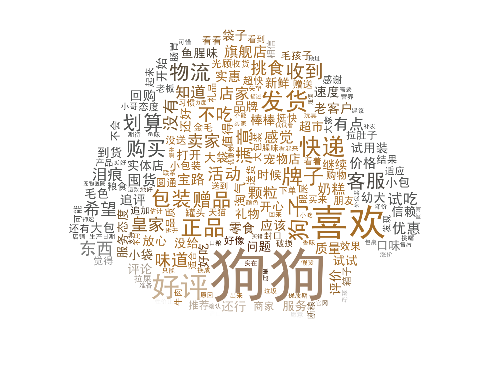

In [838]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_5.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=120,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_weight)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_total_tfidf.png',api=1200)

In [840]:
def tfidf(brand,image,size,save):
    df = df_raw_2[df_raw_2['brand'] == brand]['Comment'].astype('str')
    lines=df.values.tolist()
    content = "".join(lines)
    weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=())
    a_word = []
    b_weight = []
    for i in weight:
        a_word.append(i[0])
        b_weight.append(i[1])
    word_weight = dict(zip(a_word,b_weight)) 
    matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
    bimg = imageio.imread(image)
    wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=size,font_path='data/simhei.ttf',)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    wordcloud=wordcloud.fit_words(word_weight)
    bimgColors=ImageColorGenerator(bimg)
    plt.axis("off")
    plt.imshow(wordcloud.recolor(color_func=bimgColors))
    plt.savefig(save,api=1200) 
#     return wordcloud,bimgColors

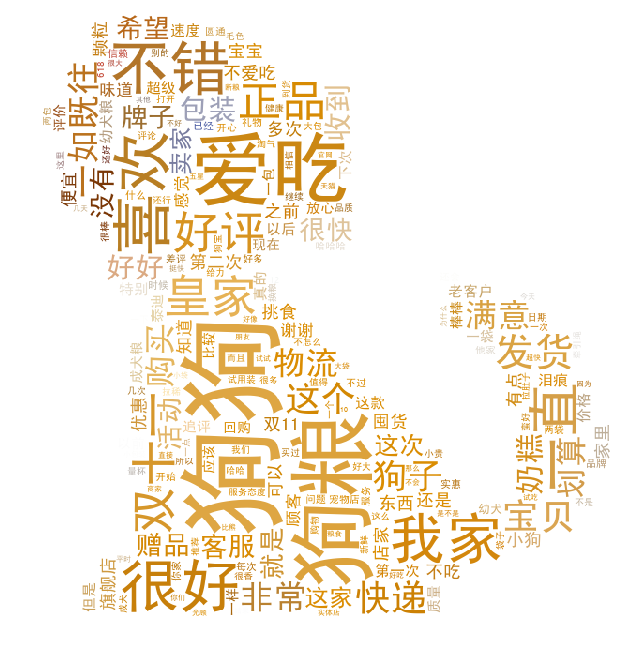

In [395]:
tfidf('royalcanin', 'image/dog_1.jpg',120,'plot_hj_iftdf.png')

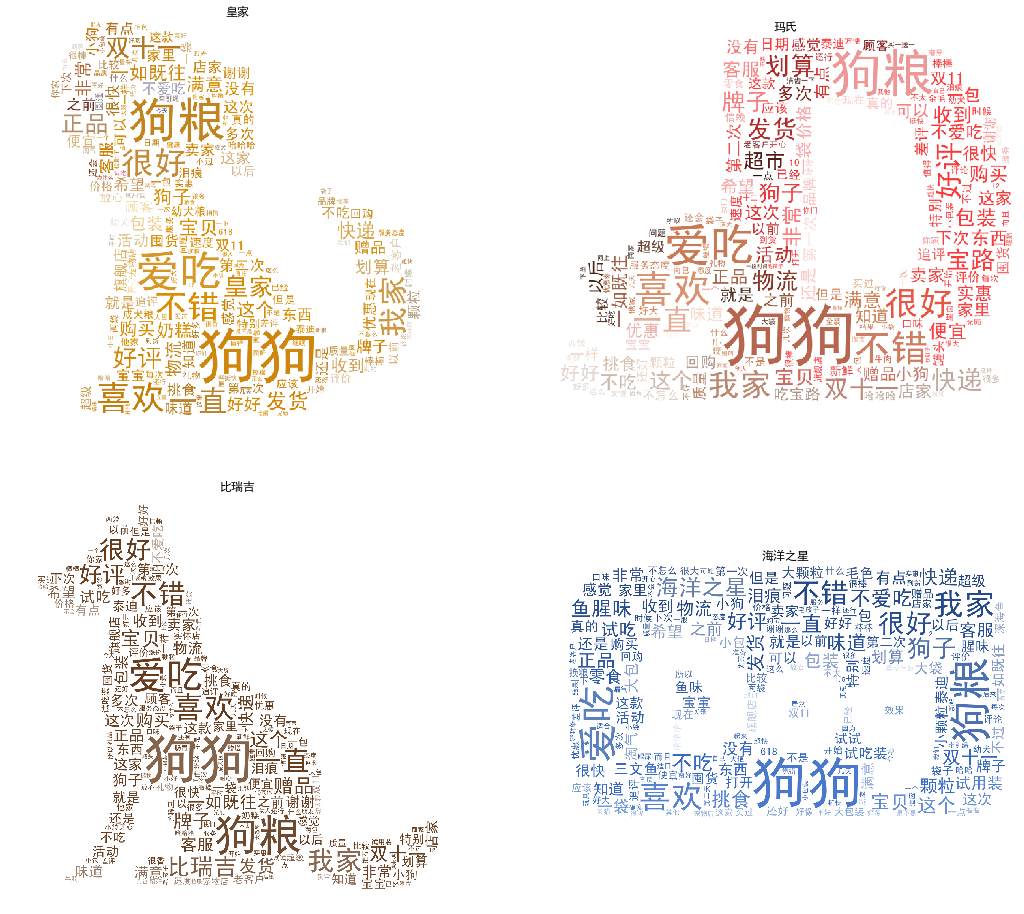

In [841]:
plt.figure(1,figsize = (18,16))
plt.subplot(221)
tfidf('royalcanin', 'image/dog_1.jpg',100,'plot_hj_iftdf.png')
plt.title('皇家')
plt.subplot(222)
tfidf('marspet', 'image/dog_3.jpg',100,'plot_ms_iftdf.png')
plt.title('玛氏')
# plt.figure(2,figsize = (18,16))
plt.subplot(223)
tfidf('biruiji', 'image/dog_2.jpg',200,'plot_brj_iftdf.png')
plt.title('比瑞吉')
plt.subplot(224)
tfidf('fish4dogs', 'image/dog_4.jpg',150,'plot_hyzx_iftdf.png')
plt.title('海洋之星')


###### 情感分析

textblog https://blog.csdn.net/u013378306/article/details/55510156

In [842]:
import snownlp
from snownlp import SnowNLP

http://blog.sciencenet.cn/blog-377709-1062960.html

In [843]:
s= SnowNLP('质量很差')

In [844]:
s.words

['质量', '很', '差']

In [846]:
s.sentiments

0.2134691150305329

In [847]:
df_raw_2['Comment'][4]

'靠谱 打开很香不腥'

In [850]:
df_raw_2['Comment'][3]

'差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和鸡肉吃了4天，狗狗不拉稀了，我以为是第一袋开了太长时间于是就把第一袋剩余的狗粮扔了，打开了第二袋，第二代吃了两天之后狗狗又开始拉稀，我觉得应该是狗粮有问题，请大家慎重购买。'

In [852]:
ss = s= SnowNLP(df_raw_2['Comment'][3])
ss.sentiments

2.000177801164682e-12

In [853]:
senti_hj = DataFrame(df_raw_2[df_raw_2['brand'] == 'royalcanin']['Comment'])
senti_ms = DataFrame(df_raw_2[df_raw_2['brand'] == 'marspet']['Comment'])
senti_brj = DataFrame(df_raw_2[df_raw_2['brand'] == 'biruiji']['Comment'])
senti_hyzx = DataFrame(df_raw_2[df_raw_2['brand'] == 'fish4dogs']['Comment'])

In [854]:
def senti_core (brand_comm):
    score=[]
    for i in brand_comm.Comment:
        if str(i) != '':
            s=SnowNLP(str(i))
            score.append(s.sentiments)
        else:
            score.append('') 
    brand_comm ['Score'] = score
    return brand_comm

In [855]:
senti_hj_score = senti_core(senti_hj)
senti_ms_score = senti_core(senti_ms)
senti_brj_score = senti_core(senti_brj)
senti_hyzx_score = senti_core(senti_hyzx)

In [857]:
senti_ms_score

,Comment,Score
31377,很好，狗狗很爱吃,0.961498
31378,双11的又吃完了，又来买买买啦哈哈哈哈哈哈,0.969864
31379,应该还不错,0.883015
31380,发货快！8岁的狗狗一直在吃,0.528303
31381,帮朋友买的，评价这事我就给忘了。一直都在这家买。 很好,0.66663
31382,今天收到狗粮了，开始还担心狗不吃狗粮，因为一直都是吃鸭肝拌饭，尝试着放了几颗没想到居然吃了，...,0.00162892
31383,算上邮费比实体店要贵。 但是因为实体店买不到这个品种,0.0455389
31384,到货很快，虽然狗狗不吃，但是到货很快,0.928277
31385,跟超市差不多,0.71439
31386,卖家发货速度非常快，棒棒哒,0.82654


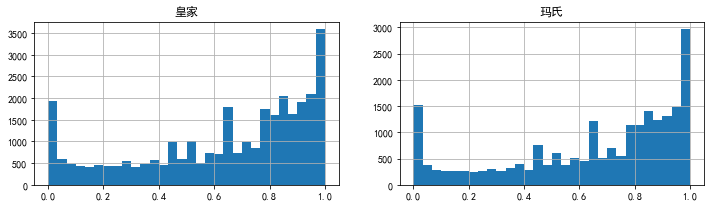

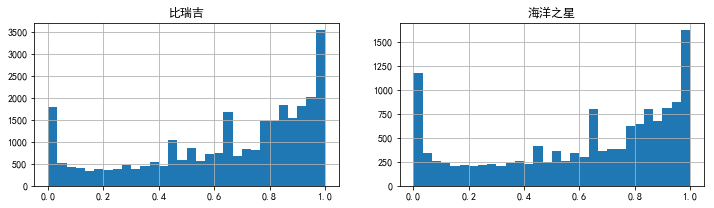

In [858]:
plt.figure(1,figsize = (12,3))
plt.subplot(121)
senti_hj_score[senti_hj_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('皇家')
plt.subplot(122)
senti_ms_score[senti_ms_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('玛氏')
plt.figure(2,figsize = (12,3))
plt.subplot(121)
senti_brj_score[senti_brj_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('比瑞吉')
plt.subplot(122)
senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('海洋之星')

In [859]:
def average(seq): 
    return float(sum(seq)) / len(seq)

In [860]:
hj_dic = {"brand":"皇家","avg_score":average(senti_hj_score[senti_hj_score['Comment']!='']['Score'])}
ms_dic = {"brand":"玛氏","avg_score":average(senti_ms_score[senti_ms_score['Comment']!='']['Score'])}
brj_dic = {"brand":"比瑞吉","avg_score":average(senti_brj_score[senti_brj_score['Comment']!='']['Score'])}
hyzx_dic = {"brand":"海洋之星","avg_score":average(senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'])}


In [861]:
df_avg_score =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
                         "avg_score":[average(senti_hj_score[senti_hj_score['Comment']!='']['Score']),
                                     average(senti_ms_score[senti_ms_score['Comment']!='']['Score']),
                                     average(senti_brj_score[senti_brj_score['Comment']!='']['Score']),
                                     average(senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'])]}    )

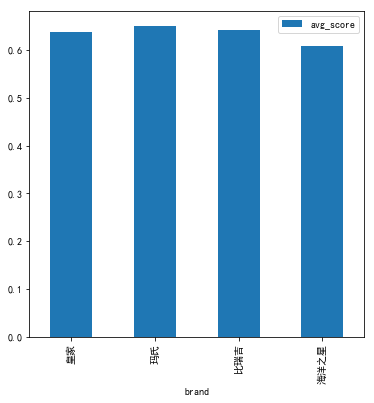

In [862]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
df_avg_score.set_index("brand").plot(kind ="bar")

In [607]:
pd.core.series.Series.hist?

In [612]:
pd.core.series.Series.plot?

In [865]:
def neg_comm(brand_comm_score):
    neg =[]
    brand_comm_score = brand_comm_score.reset_index(drop =True)
    for i in range(len(brand_comm_score.Score)):
        if brand_comm_score.Score[i] != '' and brand_comm_score.Score[i]< 0.001:
            neg.append(brand_comm_score.Comment[i])
    return neg

In [866]:
senti_ms_score.reset_index(drop =True)

,Comment,Score
0,很好，狗狗很爱吃,0.961498
1,双11的又吃完了，又来买买买啦哈哈哈哈哈哈,0.969864
2,应该还不错,0.883015
3,发货快！8岁的狗狗一直在吃,0.528303
4,帮朋友买的，评价这事我就给忘了。一直都在这家买。 很好,0.66663
5,今天收到狗粮了，开始还担心狗不吃狗粮，因为一直都是吃鸭肝拌饭，尝试着放了几颗没想到居然吃了，...,0.00162892
6,算上邮费比实体店要贵。 但是因为实体店买不到这个品种,0.0455389
7,到货很快，虽然狗狗不吃，但是到货很快,0.928277
8,跟超市差不多,0.71439
9,卖家发货速度非常快，棒棒哒,0.82654


In [524]:
senti_ms_score

,Comment,score
31377,很好，狗狗很爱吃,0.961498
31378,双11的又吃完了，又来买买买啦哈哈哈哈哈哈,0.969864
31379,应该还不错,0.883015
31380,发货快！8岁的狗狗一直在吃,0.528303
31381,帮朋友买的，评价这事我就给忘了。一直都在这家买。 很好,0.66663
31382,今天收到狗粮了，开始还担心狗不吃狗粮，因为一直都是吃鸭肝拌饭，尝试着放了几颗没想到居然吃了，...,0.00162892
31383,算上邮费比实体店要贵。 但是因为实体店买不到这个品种,0.0455389
31384,到货很快，虽然狗狗不吃，但是到货很快,0.928277
31385,跟超市差不多,0.71439
31386,卖家发货速度非常快，棒棒哒,0.82654


In [872]:
senti_ms_neg = neg_comm(senti_ms_score)
senti_ms_neg

['不想多说什么 乱七八糟的 上次箱子破烂好歹里面都是整盒的 这次箱子破烂 连盒子都省了 要不是因为旗舰店 我一定不会选择你家',
 '我家吉娃娃十岁了，头一次买这个狗粮，但真的很硬，它的牙齿已经不行了，砸都不好砸开，不能吃这么硬的了，不如之前买散装的狗粮',
 '纸盒来到的时候已经烂了，作为玛氏的品牌真是太不专业了！！！！到售后，简直是我遇到最最最最最最最差的！！！开个发票开了一个星期，开出来了，收件用了3天。售后让我晚点查物流，自己却又下班了！！完全没有人跟进，这不是忽悠消费者吗！！！！！以后再也不会在这里买东西',
 '冬天狗狗就是能吃，换了狗粮，居然也不反感。 客服回复有点慢',
 '第1袋吃完了，现在买第2袋。平时搭配猪肝饭给他吃的，一个月吃光光了。宝今年十岁了，八斤多，从小一直吃宝路，只吃牛肉味，鸡肉味的几乎不吃，这里的超市和宠物店都没有老龄犬型。第一次在网上购狗粮，没让我失望，包装自带封口槽，便于储存，不会受潮。一个月之后还是咯嘣脆。以后可以放心购买了。',
 '这个快递员就是个奇葩！我不在家让他放自提柜 他跟我来一句干嘛不早说  脑子是没长吗？我买东西还要跟你汇报在不在家？！',
 '作为食品商家，一定要保证商品不能破损，食品包装也有写到，如发现包装破损请勿食用吧！但是这个玛氏客服的回答真是绝了：说是无伤大雅！！！不能因为是狗狗们的实物 就这样马虎吧！你们还是旗舰店！玛氏那么大的公司这样回答 是不是太不专业！我也是看公司有名才买，也许事实你们暗地里想这狗粮 你们都不知道是怎么做出来的吧，还在这因为包装破损纠结！所以我一般也不会给狗当主餐，都是用几颗作为鼓励表用用！',
 '东西还不错。网上看到是旗舰才相信贵店在你们家买的东西，本想服务方面应该是最好的，结果令人大跌眼镜！买了这么多东西，就是这样一个包装（上图给亲看看），旗舰店呀！包装的纸箱不规范简陋就算了，连个?带纸封一下都这么的简单，横竖就两道呀！太奇葩了吧！四周留下这么大的豁口呀！能不掉东西吗？这后台的打包人是要给老板您省几个钱呢？还是想砸你的牌子呢？拍的时候我还一再跟客服说包装牢固些包装牢固些，太让我无语了！结果丢了一包妙鲜包。亲！您还是让这种人早些走人得了！要不然您的牌牌迟早砸在他手里！一码归一码，前台和售后客服还是不错滴，很客气，帮我解决东西丢失的事情。 补个照片，店老板看看',
 '绝对的

In [873]:
df=pd.DataFrame(senti_ms_neg)
df

,0
0,不想多说什么 乱七八糟的 上次箱子破烂好歹里面都是整盒的 这次箱子破烂 连盒子都省了 要不是...
1,我家吉娃娃十岁了，头一次买这个狗粮，但真的很硬，它的牙齿已经不行了，砸都不好砸开，不能吃这么...
2,纸盒来到的时候已经烂了，作为玛氏的品牌真是太不专业了！！！！到售后，简直是我遇到最最最最最最...
3,冬天狗狗就是能吃，换了狗粮，居然也不反感。 客服回复有点慢
4,第1袋吃完了，现在买第2袋。平时搭配猪肝饭给他吃的，一个月吃光光了。宝今年十岁了，八斤多，从...
5,这个快递员就是个奇葩！我不在家让他放自提柜 他跟我来一句干嘛不早说 脑子是没长吗？我买东西...
6,作为食品商家，一定要保证商品不能破损，食品包装也有写到，如发现包装破损请勿食用吧！但是这个玛...
7,东西还不错。网上看到是旗舰才相信贵店在你们家买的东西，本想服务方面应该是最好的，结果令人大跌...
8,绝对的差评，发过来的是破损的，，还是用胶布粘起来的，还不承认，说是快递搞得，那你们包装有包好...
9,卖的比超市还贵 还要运费，重点是快递发了5天，第二天就能到的东西 汇通这么坑！压了4天才发。


In [ ]:
def tfidf(neg,image,size,save):
    df = df_raw_2[df_raw_2['brand'] == brand]['Comment'].astype('str')
    lines=df.values.tolist()
    content = "".join(lines)
    weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=())
    a_word = []
    b_weight = []
    for i in weight:
        a_word.append(i[0])
        b_weight.append(i[1])
    word_weight = dict(zip(a_word,b_weight)) 
    matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
    bimg = imageio.imread(image)
    wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=size,font_path='data/simhei.ttf',)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    wordcloud=wordcloud.fit_words(word_weight)
    bimgColors=ImageColorGenerator(bimg)
    plt.axis("off")
    plt.imshow(wordcloud.recolor(color_func=bimgColors))
    plt.savefig(save,api=1200) 